<a href="https://colab.research.google.com/github/kozen88/progettoAI/blob/main/source/Imbalance_learning_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto Igegneria della conoscenza 2023


## Data understanding & explorating


In [1]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df_impiegati = pd.read_csv('Data_set_impiegati.csv')

In [ ]:
df_impiegati

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

In [ ]:
excel_file = 'Data_set_impiegati.xlsx'
df_impiegati.to_excel(excel_file, index=False)

In [ ]:
# Calcola il numero di righe che soddisfano il criterio utilizzando la funzione sum
impiegati_leave = (df_impiegati['left'] == 1).sum()
print(f"Il numero di righe con valore {1} nella colonna {'left'} è: {impiegati_leave}")

Il numero di righe con valore 1 nella colonna left è: 3571


In [ ]:
impiegati_stay = (df_impiegati['left'] == 0).sum()
print(f"Il numero di righe con valore {0} nella colonna {'left'} è: {impiegati_stay}")

Il numero di righe con valore 0 nella colonna left è: 11428


In [ ]:
print(f"task di classificazione sbilanciato: \nrestano : {impiegati_stay} \n       vs\nsi ricenziano : {impiegati_leave}")

task di classificazione sbilanciato: 
restano : 11428 
       vs
si ricenziano : 3571


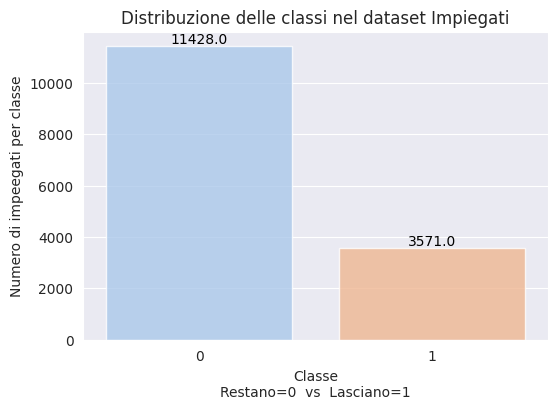

In [4]:
# andiamo a definire su quale colonna eseguire il conteggio degli esempi per classe
class_counts = df_impiegati['left'].value_counts()

# Crea un barplot per mostrare lo sbilanciamento tra le classi
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel", alpha=0.8)
plt.xlabel('Classe\nRestano=0  vs  Lasciano=1')
plt.ylabel('Numero di impeegati per classe')
plt.title('Distribuzione delle classi nel dataset Impiegati')

# Aggiungi il numero effettivo degli esempi sopra ogni barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

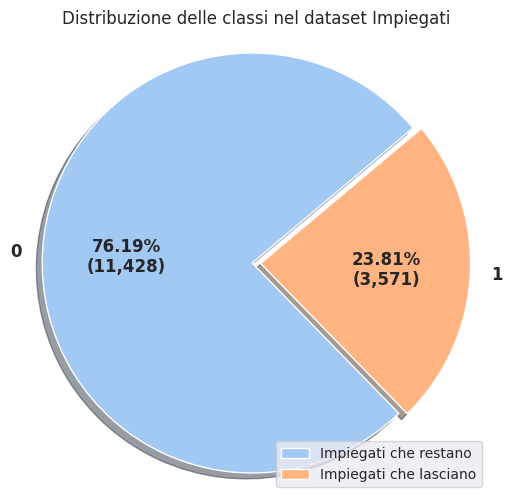

In [5]:
# Crea un pie chart per visualizzare lo sbilanciamento tra le classi
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel')
sns.set_palette(colors)

# Imposta il formato delle percentuali per il pie chart
def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return f"{pct:.2f}%\n({absolute:,d})"

# Aggiungi spazio tra le parti del grafico
explode = (0.02, 0.02)  # Aggiunge spazio solo alla prima fetta (classe "Impiegati che restano")

plt.pie(class_counts, labels=class_counts.index, autopct=lambda pct: func(pct, class_counts), startangle=40,
        textprops={'fontsize': 12, 'fontweight': 'bold'}, explode=explode, shadow=True)

plt.title('Distribuzione delle classi nel dataset Impiegati')
plt.axis('equal')  # Rende il pie chart circolare

# Aggiungi una leggenda con la spiegazione delle classi
legend_labels = ['Impiegati che restano', 'Impiegati che lasciano']
plt.legend(legend_labels, loc='lower right')
plt.show()

Cerchiamo di capire i dati con cui abbiamo a che fare e come è fatto il nostro dataframe.

In [ ]:
df_impiegati.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2        

In [ ]:
df_impiegati.tail

<bound method NDFrame.tail of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2        

In [ ]:
df_impiegati.shape

(14999, 10)

In [6]:
columns_name_df = df_impiegati.columns
print(columns_name_df)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [7]:
# Serve ad estrarre le informazione contenute nelle colonne del dataframe e produrre una tabella markdown
def info_table(dataframe):
    column_names = dataframe.columns
    column_types = dataframe.dtypes

    # Crea una lista di tuple contenente i nomi delle colonne e i tipi di dati
    column_info = [(col, dtype) for col, dtype in zip(column_names, column_types)]

    # Crea una tabella Markdown con le informazioni delle colonne
    markdown_table = "| Nome Colonna | Tipo Dato |\n"
    markdown_table += "|--------------|-----------|\n"

    for col, dtype in column_info:
        markdown_table += f"| {col} | {dtype} |\n"

    return markdown_table

In [8]:
# Stampa la tabella Markdown dopo aver chiama la funzione di creazione della tabella
print(info_table(df_impiegati))

| Nome Colonna | Tipo Dato |
|--------------|-----------|
| satisfaction_level | float64 |
| last_evaluation | float64 |
| number_project | int64 |
| average_montly_hours | int64 |
| time_spend_company | int64 |
| Work_accident | int64 |
| left | int64 |
| promotion_last_5years | int64 |
| sales | object |
| salary | object |



La colonna del data set "sales" ha un nome poco indicativo di fatto sta a rappresentrare i reparti della azienda in cui gli impiegati lavorano per cui è appropriato andare a modificarne il nome per chiarezza.

In [9]:
df_impiegati = df_impiegati.rename(columns={'sales': 'department'})

In [10]:
column_name_after = df_impiegati.columns
print(column_name_after)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


In [ ]:
df_impiegati.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
# cambiamo il valore hr con il più chiaro e leggibile human resources
df_impiegati['department'] = np.where(df_impiegati.department == 'hr', 'human_resources', df_impiegati['department'])

In [ ]:
df_impiegati.department.unique()

array(['sales', 'accounting', 'human_resources', 'technical', 'support',
       'management', 'IT', 'product_mng', 'marketing', 'RandD'],
      dtype=object)

In [12]:
# adesso andiamo a modificare 3 valori che sono assimilabile tutti al profilo tecnico ovvero
# technical , support, IT e li riportiamo tutti sul u8nico valore technical
df_impiegati['department'] = np.where(df_impiegati.department == 'support', 'technical', df_impiegati['department'])
df_impiegati['department'] = np.where(df_impiegati.department == 'IT', 'technical', df_impiegati['department'])
df_impiegati['department'] = np.where(df_impiegati.department == 'techincal', 'technical', df_impiegati['department'])
df_impiegati.department.unique()

array(['sales', 'accounting', 'human_resources', 'technical',
       'management', 'product_mng', 'marketing', 'RandD'], dtype=object)

## Checkpoint dataset pronti per applicare tecniche avanzante
Prima di procedere con successive elaborazioni del data set andiamo a salvare una copia del data set elaborato fino a ques to punto nei due formati a noi più utili excel e csv.

In [ ]:
excel_base_df = 'Impiegati_B_R.xlsx'
df_impiegati.to_excel(excel_base_df, index=False)

In [ ]:
csv_base_df = "Impiegati_B_R.csv"
df_impiegati.to_csv(csv_base_df, index=False)

## Statistiche generali sul dataset
Andiamo a porendere vidione di alcune statistiiche di base offerte da pandas sulle colonne del nostro data set che rappresentano numeri interi o decimali.

In [ ]:
# controllo dei dati mancanti
df_impiegati.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
df_impiegati.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

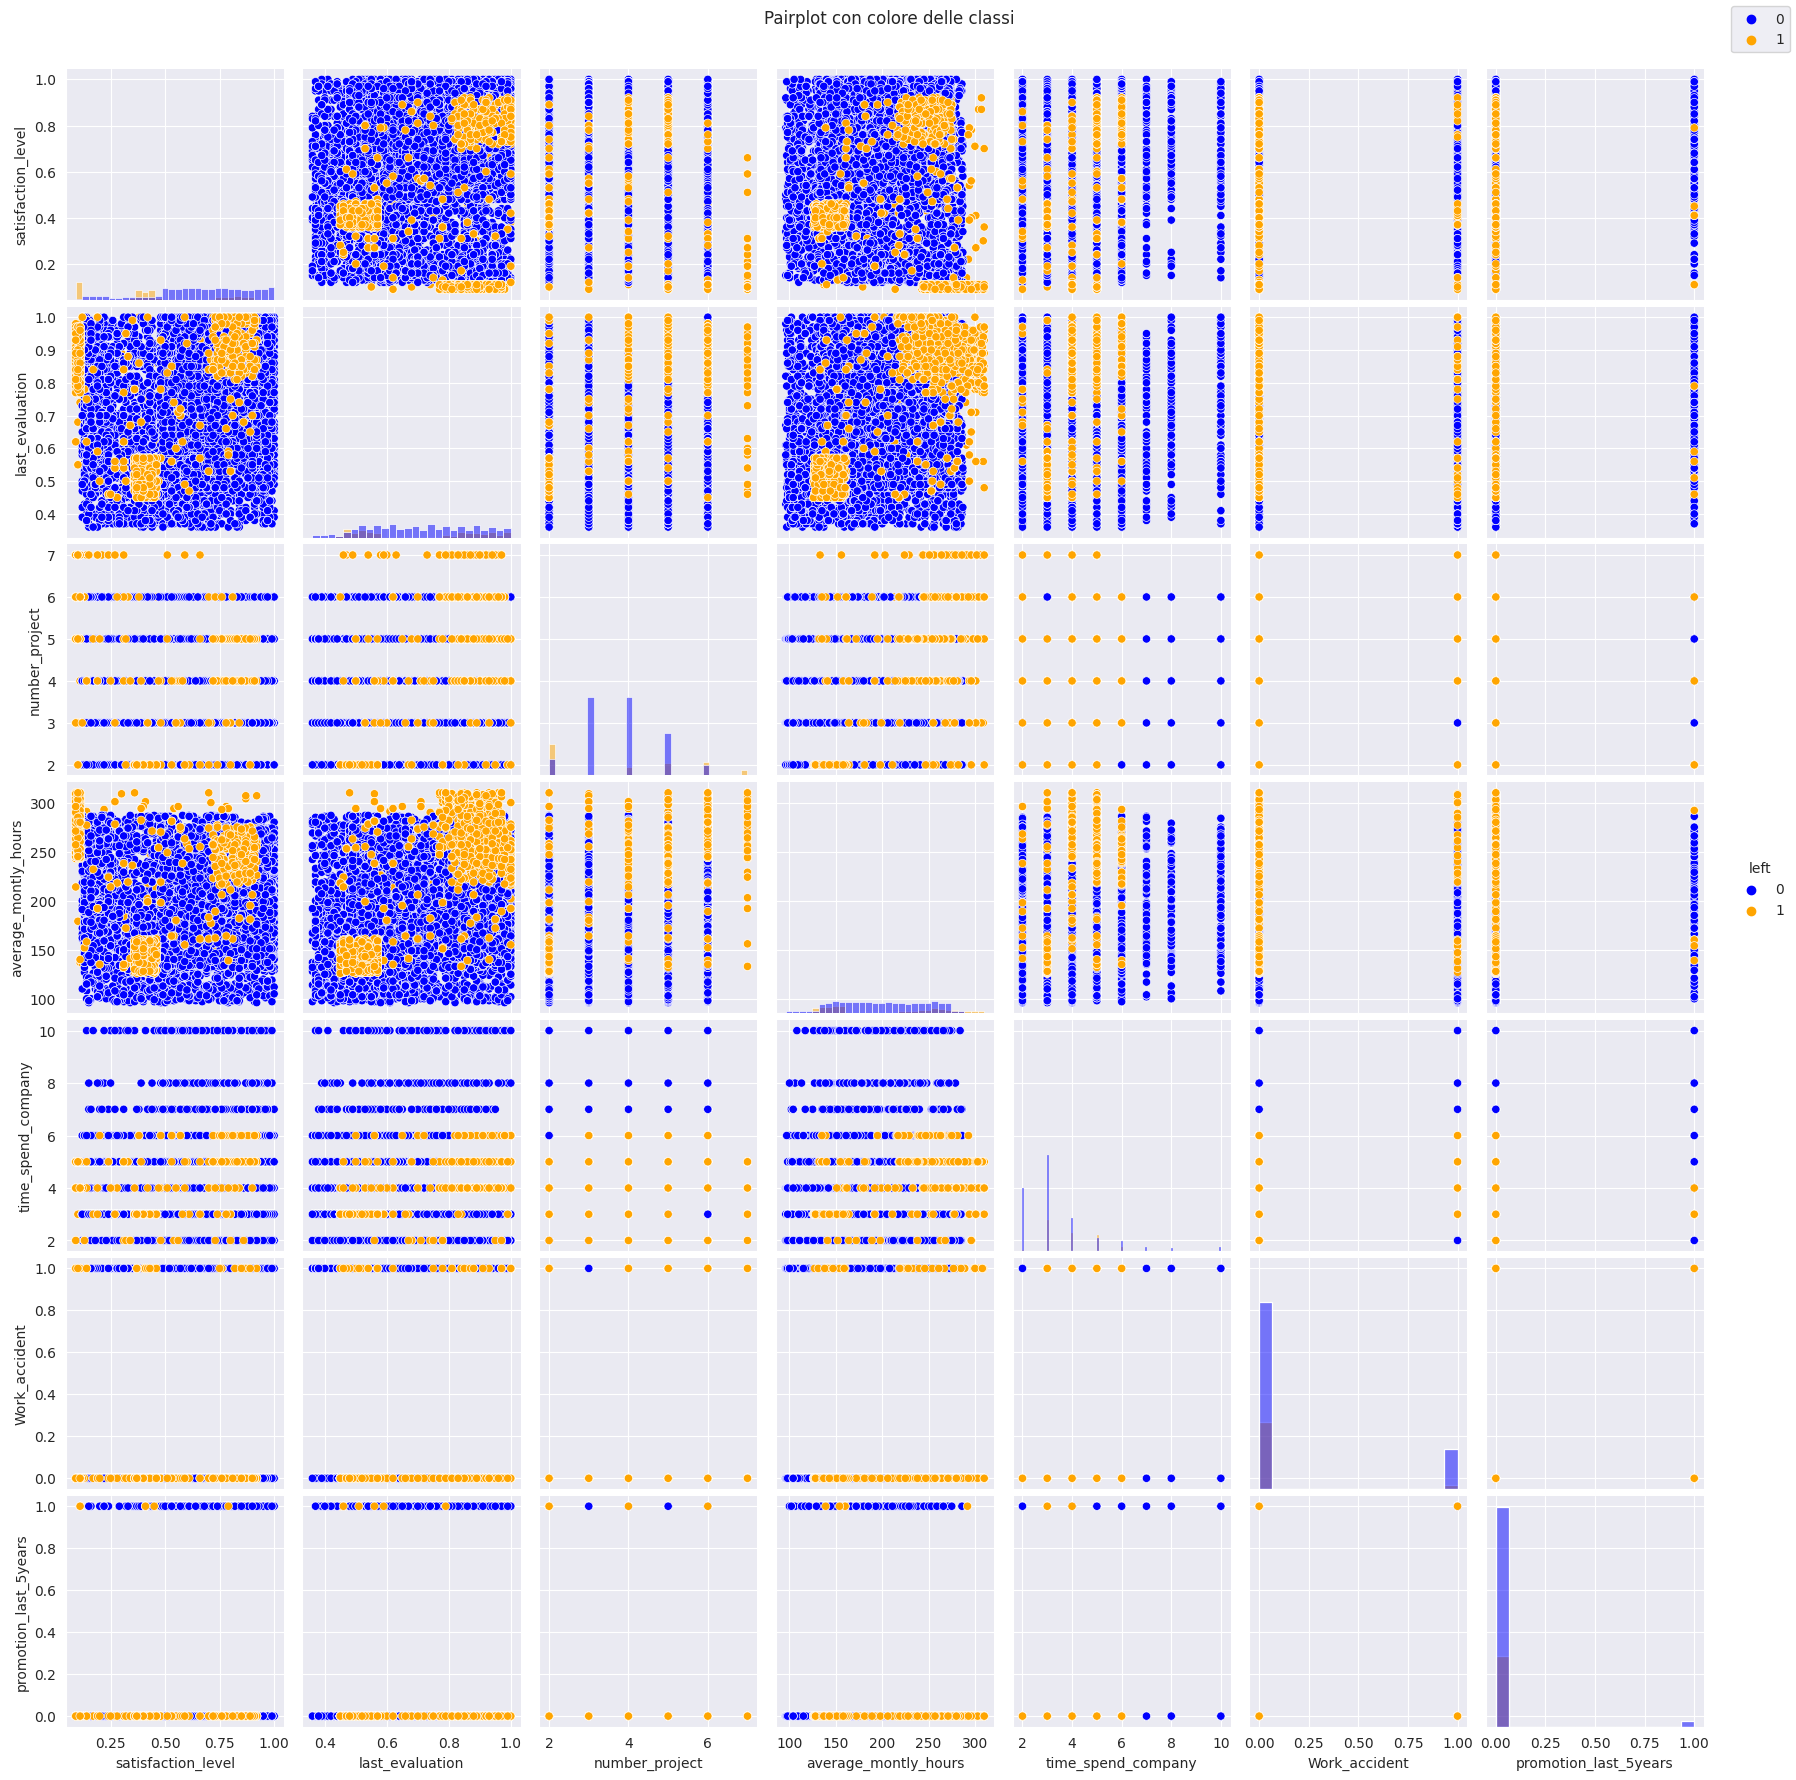

In [ ]:

# Crea un pairplot colorato
g = sns.pairplot(df_impiegati, diag_kind='hist', hue='left', palette={0: 'blue', 1: 'orange'})

# Aggiungi una legenda
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper right')

# Aggiungi un titolo al pairplot
g.fig.suptitle("Pairplot con colore delle classi", y=1.02)

# Mostra il pairplot
plt.show()

<ipython-input-28-03e0a0fd1dfb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_impiegati.corr(), annot=True, cmap='coolwarm', center=0)


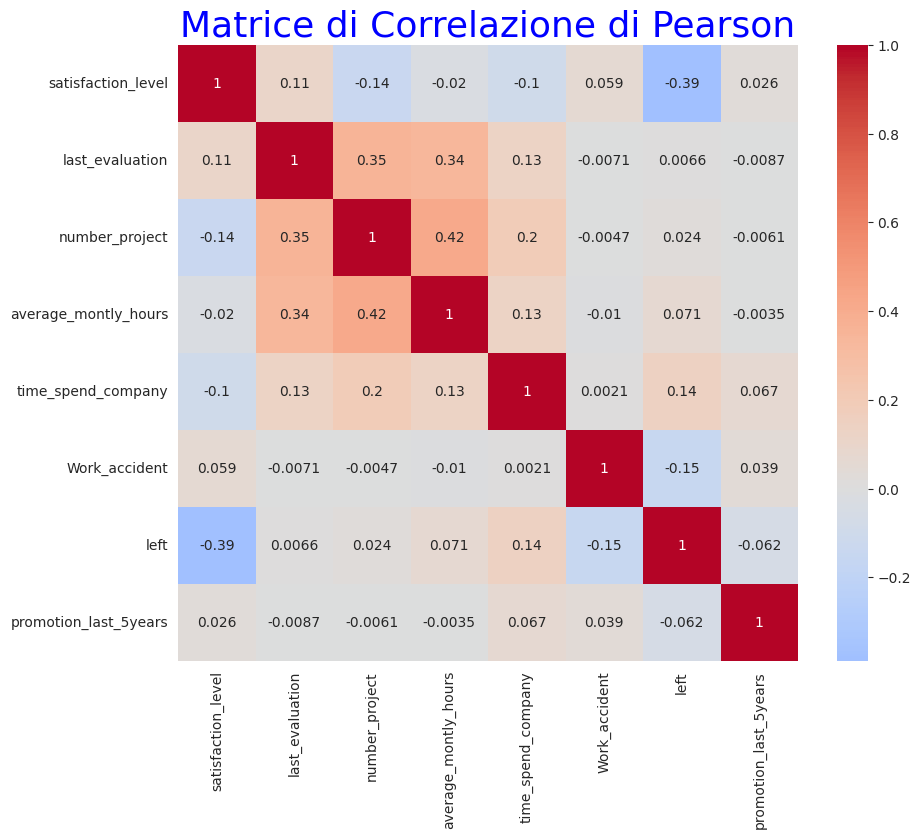

In [ ]:
# Crea una mappa di calore per visualizzare la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(df_impiegati.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di Correlazione di Pearson', fontsize=26, color='blue')
plt.show()

Effettuiamo dei bar plot sulle feature discrete che mettano in evidenza il numero di esempi per valore che prende la feature sul intero dataset.

- time_spend_company: feature discreta che indica gli anni di lavoro con l'azienda
- number_project: feature discrete che indica il numero dei progetti sui quali il dipendente lavora
- promotion_last_5years: feature booleana [0 = no promozione], [1 = si promozione]
- work_accident: feature booleana [0 = no infurtunio su lavora], [1 = si infortunio su lavoro]



<Axes: xlabel='Work_accident', ylabel='count'>

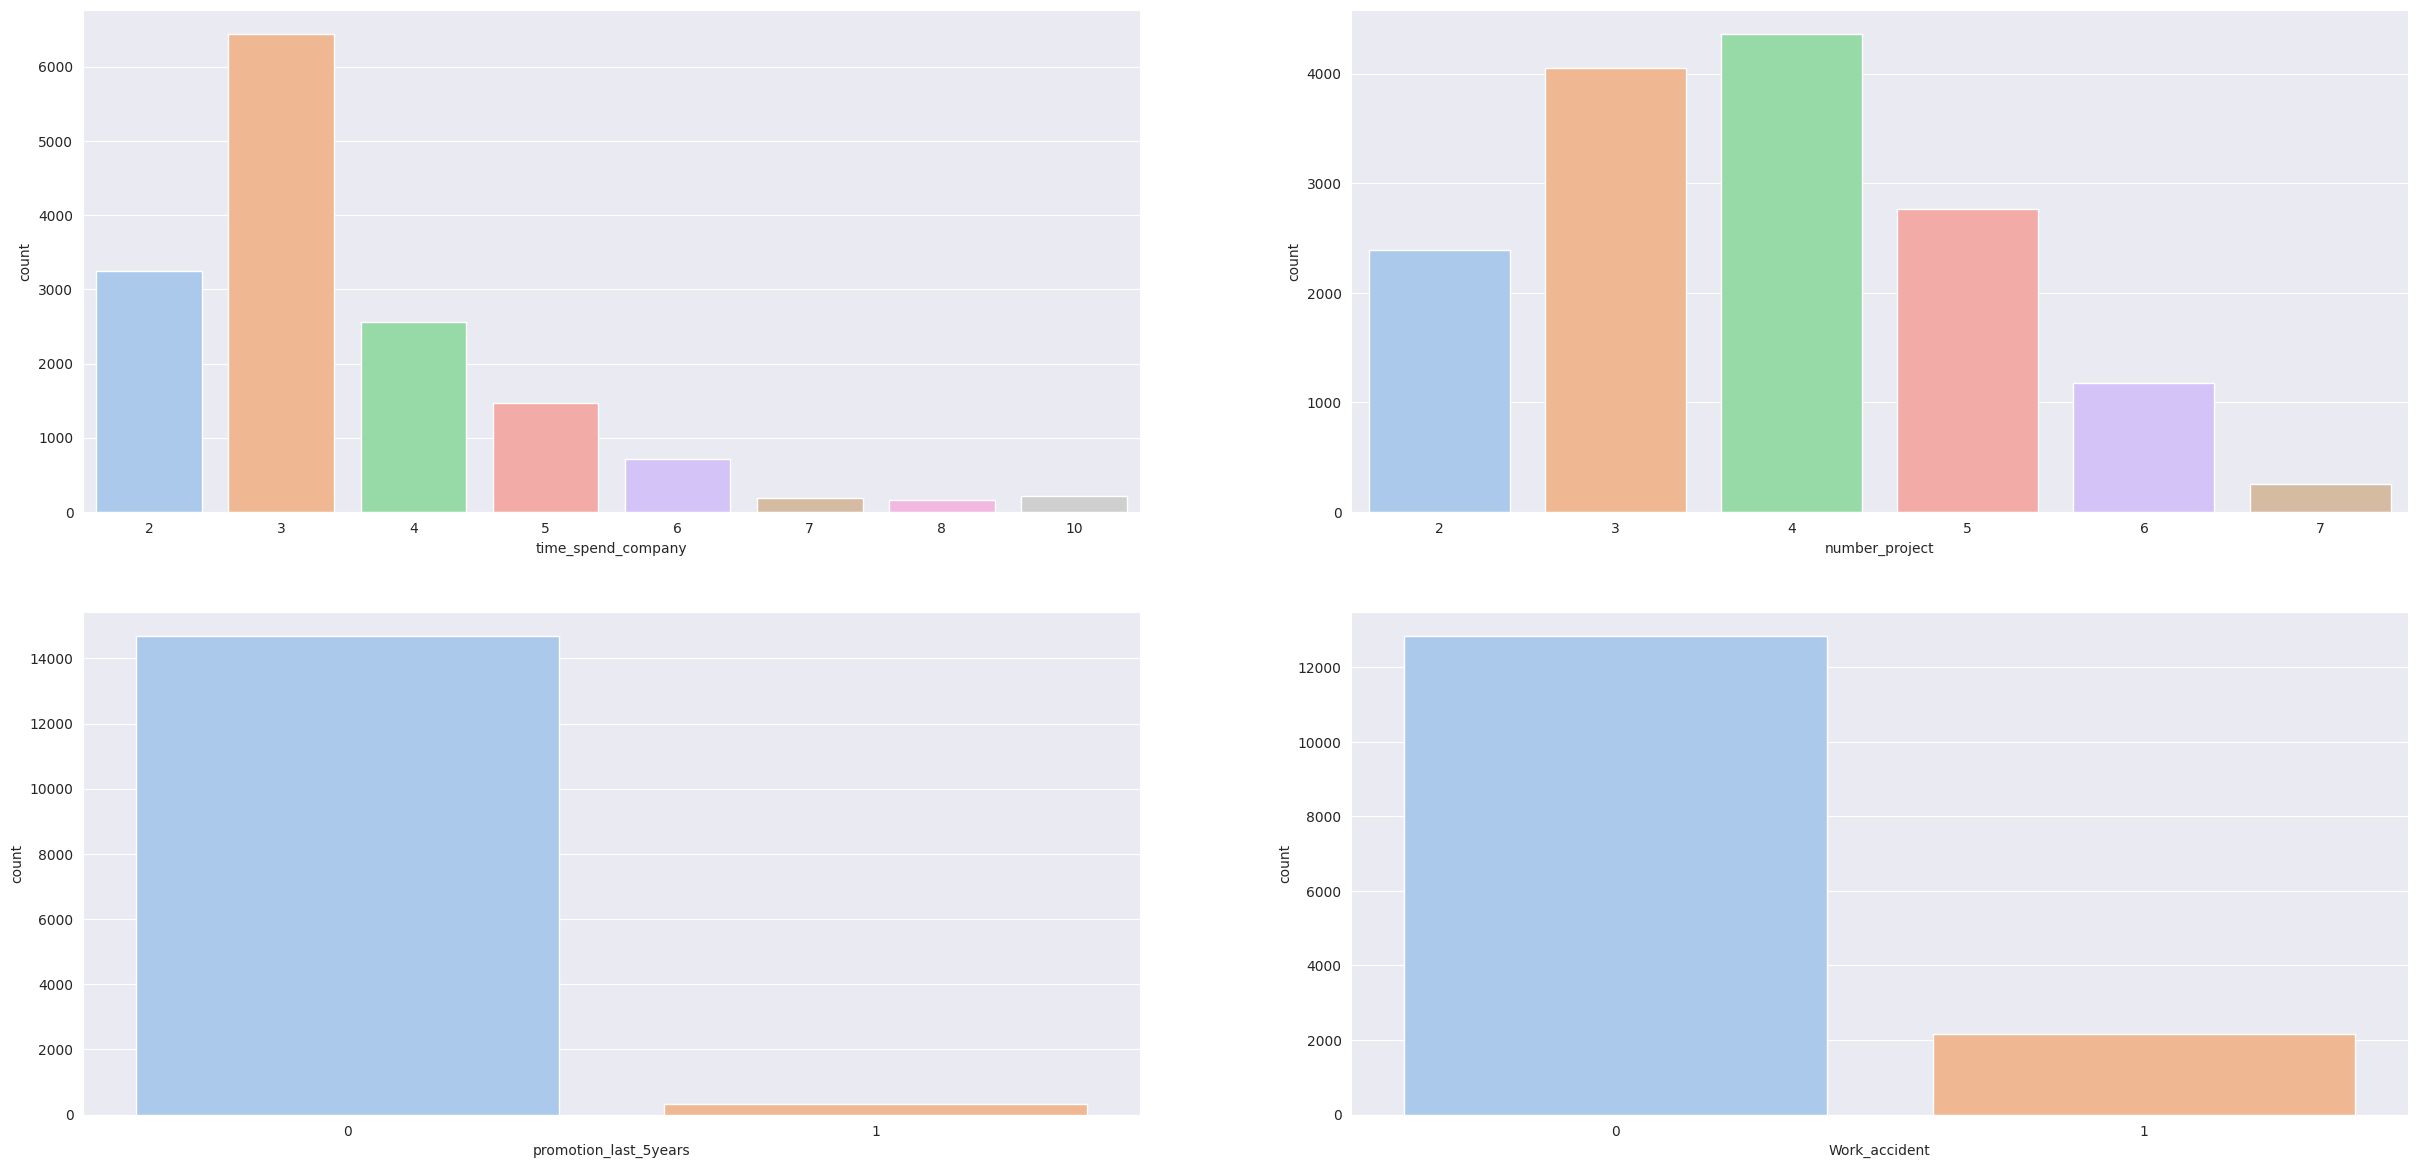

In [ ]:
plt.figure(figsize = (30,30))

plt.subplot(4,2,1)
sns.countplot(x = 'time_spend_company', data = df_impiegati)

plt.subplot(4,2,2)
sns.countplot(x = 'number_project', data = df_impiegati)

plt.subplot(4,2,3)
sns.countplot(x = 'promotion_last_5years', data = df_impiegati)

plt.subplot(4,2,4)
sns.countplot(x = 'Work_accident', data = df_impiegati)

- feature continue
Andiamo a studiare le loro caratteristiche e distribuzioni

In [ ]:
df_impiegati['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

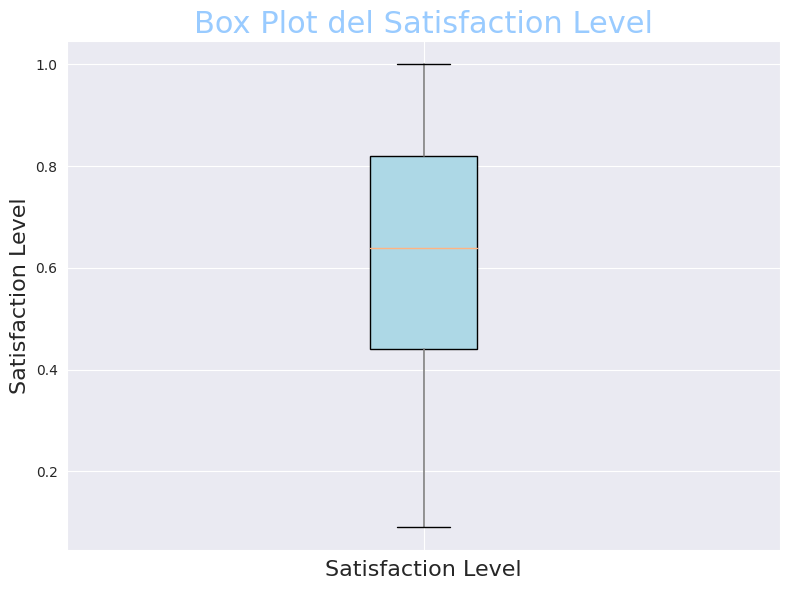

In [ ]:
plt.figure(figsize=(8, 6))

# Aggiungi colori al box plot
box = plt.boxplot(df_impiegati['satisfaction_level'], patch_artist=True)

# Colora i box e i "whiskers" con colori diversi
for patch in box['boxes']:
    patch.set_facecolor('lightblue')

for whisker in box['whiskers']:
    whisker.set(color='gray', linewidth=1.2)

plt.title('Box Plot del Satisfaction Level', fontsize=22, color='#99cbff')
plt.ylabel('Satisfaction Level', fontsize= 16)
plt.xticks([1], ['Satisfaction Level'], fontsize=16)  # Cambia l'etichetta sull'asse x
plt.tight_layout()
plt.show()

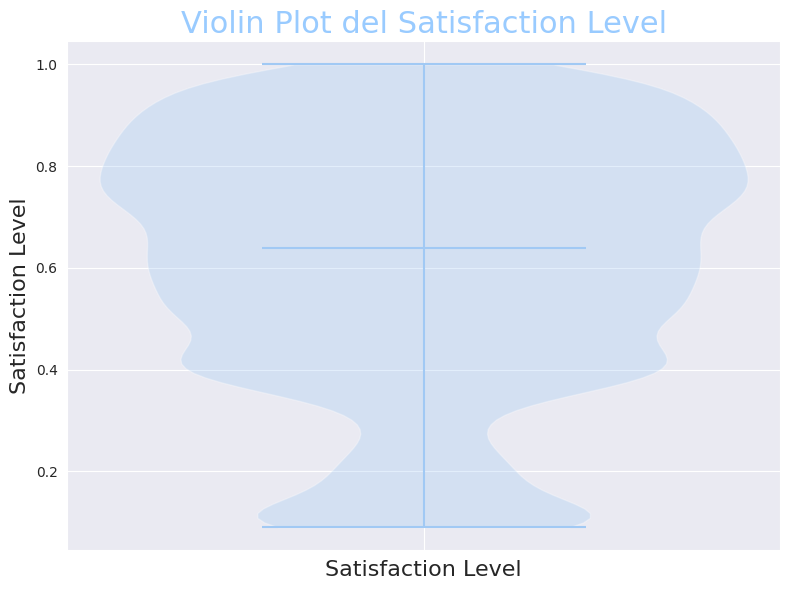

In [ ]:
plt.figure(figsize=(8, 6))

# Crea il violin plot
plt.violinplot(df_impiegati['satisfaction_level'], showmedians=True)

plt.title('Violin Plot del Satisfaction Level',fontsize=22, color='#99cbff')
plt.ylabel('Satisfaction Level', fontsize=16)
plt.xticks([1], ['Satisfaction Level'], fontsize=16)  # Cambia l'etichetta sull'asse x
plt.tight_layout()
plt.show()

In [ ]:
df_impiegati['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

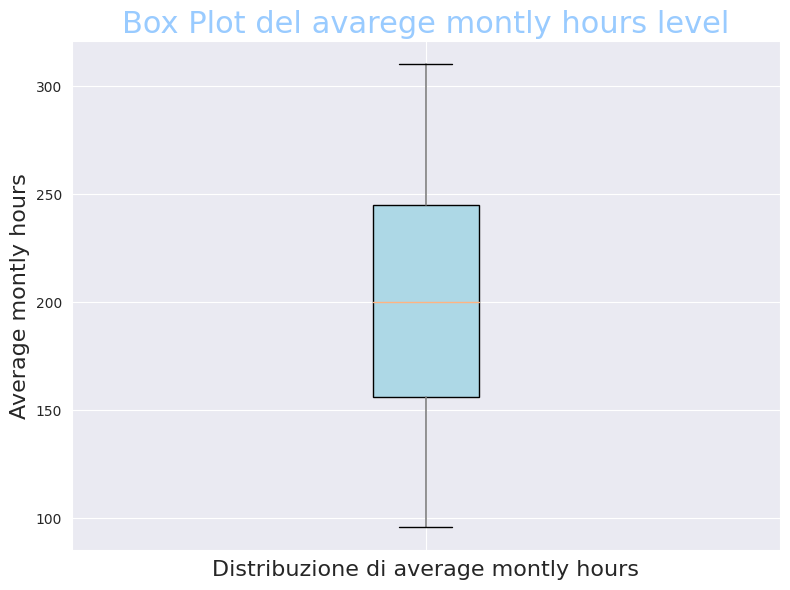

In [ ]:
plt.figure(figsize=(8, 6))

# Aggiungi colori al box plot
box = plt.boxplot(df_impiegati['average_montly_hours'], patch_artist=True)

# Colora i box e i "whiskers" con colori diversi
for patch in box['boxes']:
    patch.set_facecolor('lightblue')

for whisker in box['whiskers']:
    whisker.set(color='gray', linewidth=1.2)

plt.title('Box Plot del avarege montly hours level', fontsize=22, color='#99cbff')
plt.ylabel('Average montly hours', fontsize= 16)
plt.xticks([1], ['Distribuzione di average montly hours'], fontsize=16)  # Cambia l'etichetta sull'asse x
plt.tight_layout()
plt.show()

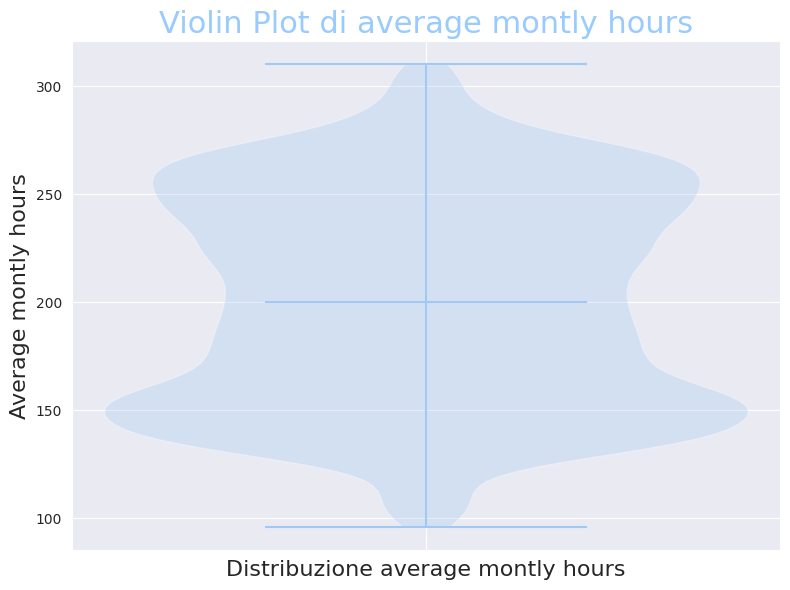

In [ ]:
plt.figure(figsize=(8, 6))

# Crea il violin plot
plt.violinplot(df_impiegati['average_montly_hours'], showmedians=True)

plt.title('Violin Plot di average montly hours',fontsize=22, color='#99cbff')
plt.ylabel('Average montly hours', fontsize=16)
plt.xticks([1], ['Distribuzione average montly hours'], fontsize=16)  # Cambia l'etichetta sull'asse x
plt.tight_layout()
plt.show()

In [ ]:
df_impiegati['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

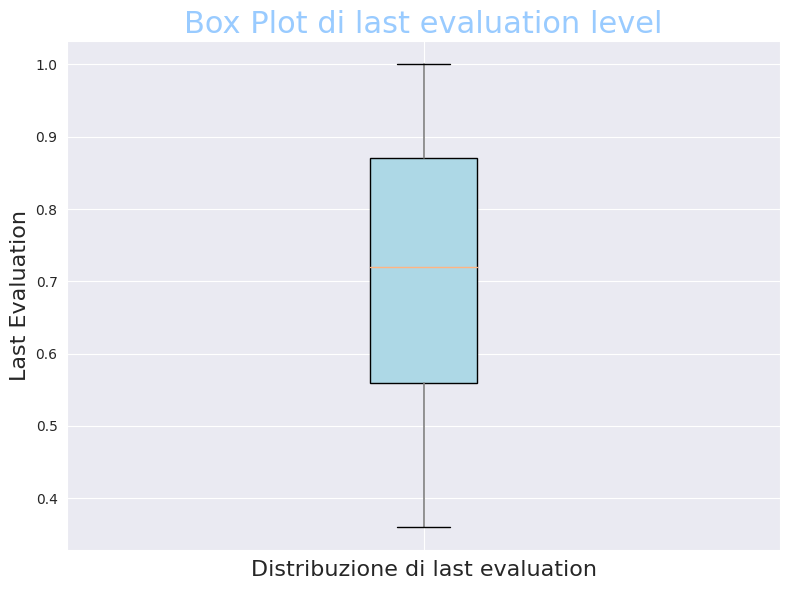

In [ ]:
plt.figure(figsize=(8, 6))

# Aggiungi colori al box plot
box = plt.boxplot(df_impiegati['last_evaluation'], patch_artist=True)

# Colora i box e i "whiskers" con colori diversi
for patch in box['boxes']:
    patch.set_facecolor('lightblue')

for whisker in box['whiskers']:
    whisker.set(color='gray', linewidth=1.2)

plt.title('Box Plot di last evaluation level', fontsize=22, color='#99cbff')
plt.ylabel('Last Evaluation', fontsize= 16)
plt.xticks([1], ['Distribuzione di last evaluation'], fontsize=16)  # Cambia l'etichetta sull'asse x
plt.tight_layout()
plt.show()

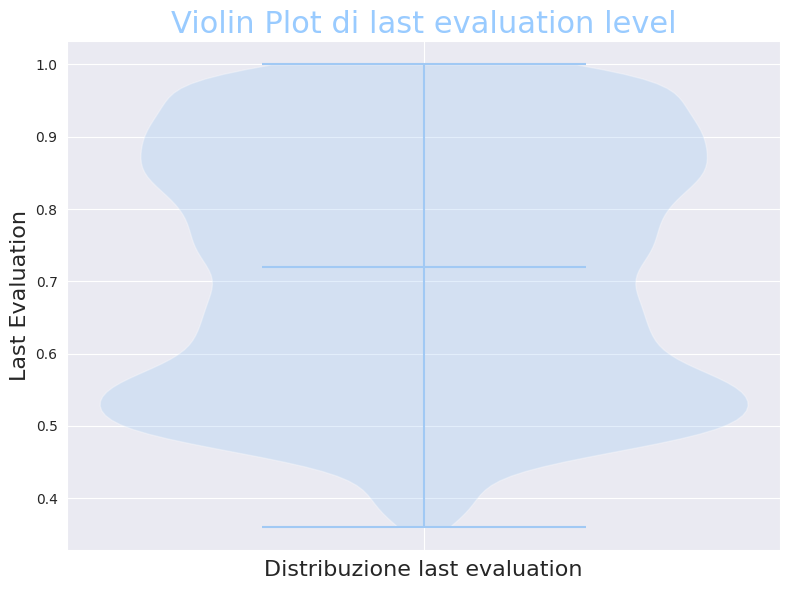

In [ ]:
plt.figure(figsize=(8, 6))

# Crea il violin plot
plt.violinplot(df_impiegati['last_evaluation'], showmedians=True)

plt.title('Violin Plot di last evaluation level',fontsize=22, color='#99cbff')
plt.ylabel('Last Evaluation', fontsize=16)
plt.xticks([1], ['Distribuzione last evaluation'], fontsize=16)  # Cambia l'etichetta sull'asse x
plt.tight_layout()
plt.show()

## ONE HOT ENCODING
Poiché il nostro scopo è quello di addestrare un classificatore dobbiamo andare a lavorare sulle features del nostro dataset in particolare siccome vogliamo usare un modello a regressione logistica ed essendo la regressione logistica un modello che si basa sulla regressione lineare abbiamo la necessità di portare tutte le colonne in forma numerica intera o continua. Per farlo useremo la one hot encoding che andrà a spacchettare gli n attributi categorici di una colonna in n colonne indicatrici. Apporteremo questa modifica sia su department che su sales.

In [ ]:
df_impiegati.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [13]:
cat_vars=['department','salary']
for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list = pd.get_dummies(df_impiegati[var], prefix=var)
  df1=df_impiegati.join(cat_list)
  df_impiegati=df1

In [14]:
df_impiegati
df_impiegati.drop(['department', 'salary'], inplace=True, axis=1)
df_impiegati.shape

(14999, 19)

In [15]:
# salviamo una copia del dataset preparato con la one hot enc
excel_file_2 = 'Data_set_impiegati_one_hot_enc.xlsx'
df_impiegati.to_excel(excel_file_2, index=False)

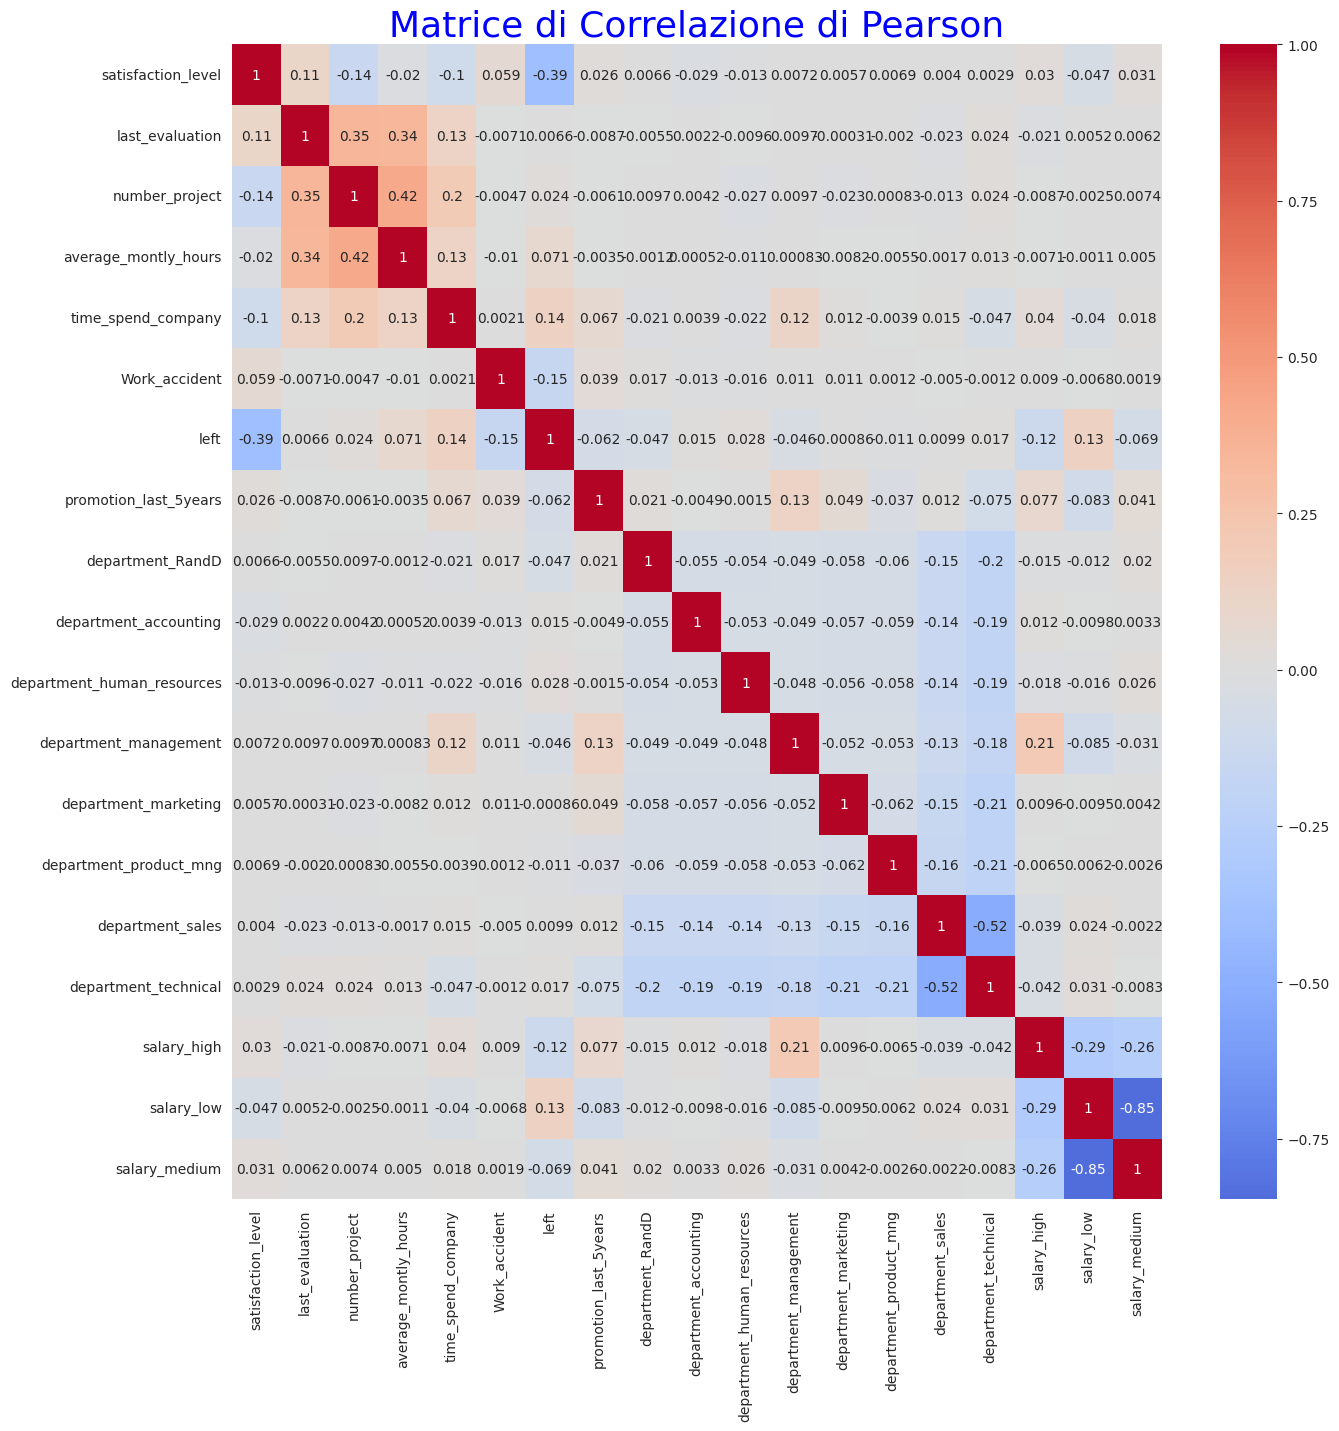

In [ ]:
# Crea una mappa di calore per visualizzare la matrice di correlazione
plt.figure(figsize=(15, 15))
sns.heatmap(df_impiegati.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di Correlazione di Pearson', fontsize=26, color='blue')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, f1_score, fbeta_score
from sklearn.model_selection import GridSearchCV

In [17]:
# Andiamo a separare la feature target dalle restanti features
X = [x for x in df_impiegati.columns if x != 'left']
y = ['left']
X = df_impiegati[X]
y = df_impiegati[y]
#y = df_impiegati['left']
#X = df_impiegati.drop('left', axis=1)


In [18]:
## scaliamo i valori in modo che siano comparabili quuando gli aalgoritmi di ML li andranno ad utilizzare
std_sc = StandardScaler()
X = std_sc.fit_transform(X)

In [ ]:
X_df = pd.DataFrame(X, columns=[x for x in df_impiegati.columns if x != 'left'])  # Assumi che 'feature_columns' sia una lista di nomi delle colonne

# salviamo una copia del dataset preparato con la one hot enc e in seguito standardizzato
excel_file_3 = 'Impiegasti_OHE_std_with.xlsx'
X_df.to_excel(excel_file_3, index=False)

## Analisi oulier e confronto delle distribuzioni
Dato che abbiamo usato la normalizzazione delle feature per poter addestrare la logistic regression utilizziamo dei boxplot per mettere in evidenza dei possibili outlier presenti nel nostro dataset e che potrebbero contribuire a far aumentare il rumore dei dati.

[Text(0.5, 0, 'Valori'),
 Text(0, 0.5, 'Feature'),
 Text(0.5, 1.0, 'Boxplot delle Feature')]

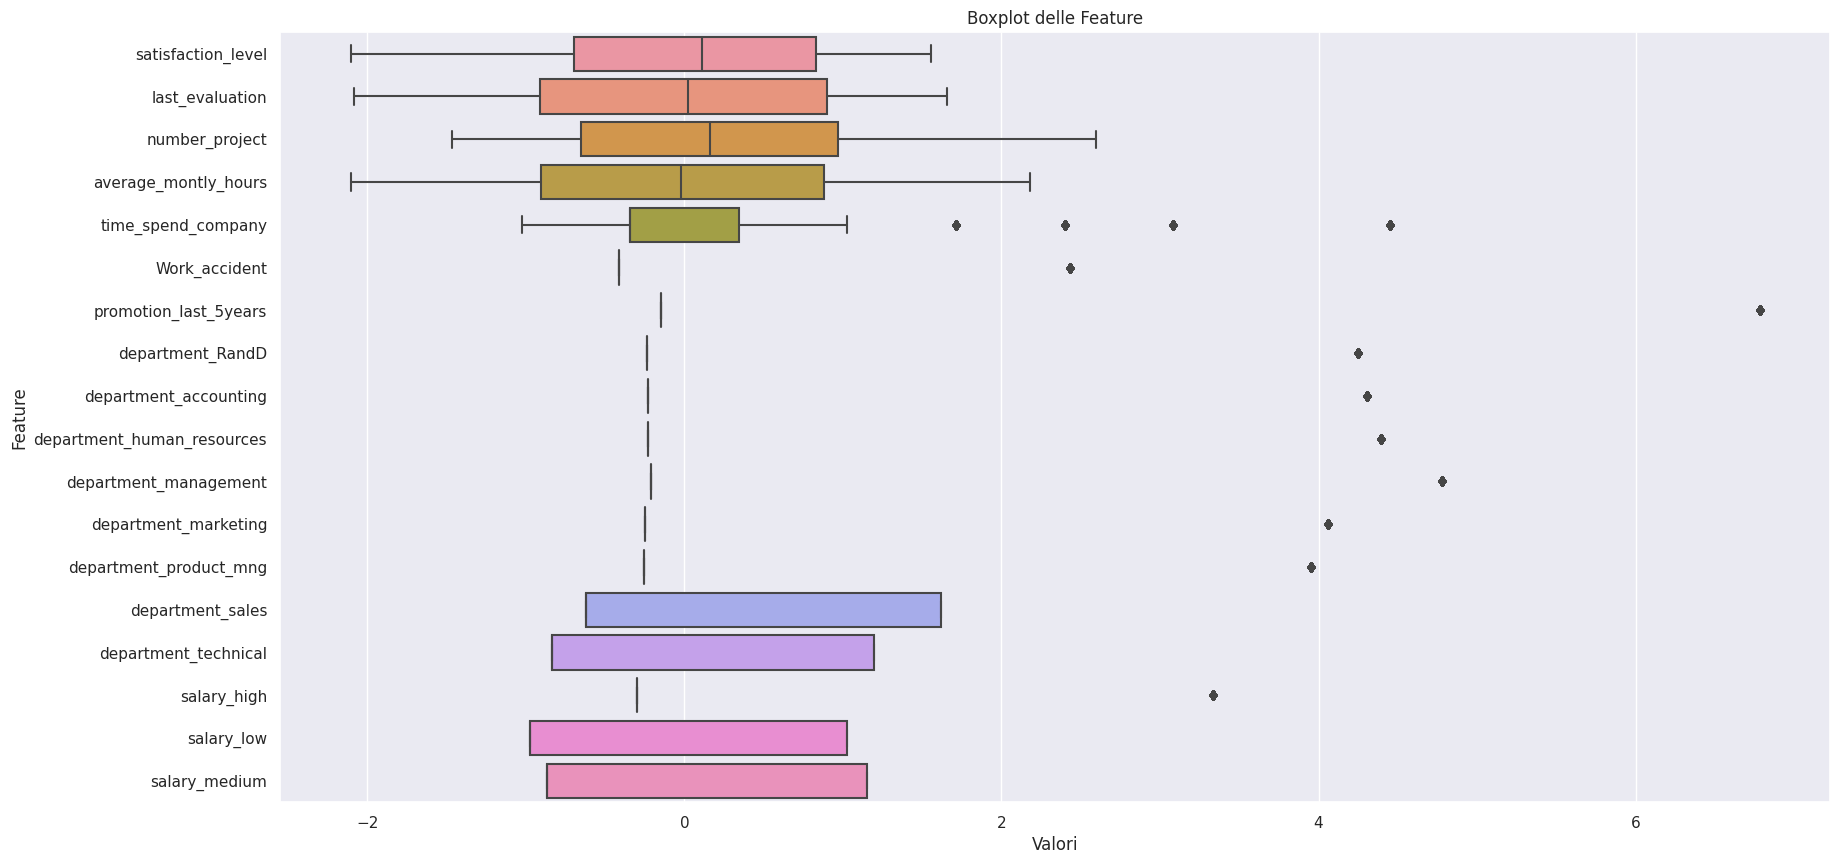

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sea_boxplot=sns.boxplot(orient="h",data=X_df)
sea_boxplot.set(xlabel='Valori', ylabel='Feature', title="Boxplot delle Feature")

In [19]:
import numpy as np
from collections import Counter

def IQR_method(df, n, features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_indices = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)]
        outlier_indices.extend(outliers.index)

    # Count the occurrences of each index (outlier) in the list
    outlier_count = Counter(outlier_indices)
    # Select indices where the count of outliers is greater than n
    multiple_outliers = [index for index, count in outlier_count.items() if count > n]

    total_outliers_removed = len(multiple_outliers)
    print('Total number of potential outliers:', total_outliers_removed)

    return multiple_outliers

In [20]:
df_impiegati_senza_OL = df_impiegati.copy()

In [ ]:
df_impiegati_senza_OL

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  department_RandD  department_accounting  \
0                          0                 0                      0   
1                          0                 0                      0   
2                          0                 0                      0   
3                          0                 0                      0   
4                          0                 0                      0   
...                      ...               ...                    ...   
14994                      0                 0                      0   
14995                      0                 0                      0   
14996                      0                 0                      0   
14997                      0                 0                      0   
14998                      0                 0                      0   

       department_human_resources  department_management  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   
...                           ...                    ...   
14994                           0                      0   
14995                           0                      0   
14996                           0                      0   
14997                           0                      0   
14998                           0                      0   

       department_marketing  department_product_mng  department_sales  \
0                         0                       0                 1   
1                         0                       0                 1   
2                         0                       0                 1   
3                         0                       0                 1   
4                         0                       0                 1   
...                     ...                     ...               ...   
14994                     0                       0                 0   
14995                     0                       0                 0   
14996                     0                       0                 0   
14997                     0                       0                 0

In [21]:
#andiamo ad applicare la funzione di rimozione degli outlier evidenziati con i boxplot
numeric_columns = (list(df_impiegati_senza_OL.loc[:]))
Outliers_IQR = IQR_method(df_impiegati_senza_OL,1,numeric_columns)
# df_out sarà il nuovo dataframe senza outlier sui quali si potrà lavorare con successivi esperimenti
df_out = df_impiegati_senza_OL.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of potential outliers: 3030


In [ ]:
df_out

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.11             0.88               7   
2                    0.72             0.87               5   
3                    0.37             0.52               2   
4                    0.41             0.50               2   
...                   ...              ...             ...   
11964                0.40             0.57               2   
11965                0.37             0.48               2   
11966                0.37             0.53               2   
11967                0.11             0.96               6   
11968                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       272                   4              0     1   
2                       223                   5              0     1   
3                       159                   3              0     1   
4                       153                   3              0     1   
...                     ...                 ...            ...   ...   
11964                   151                   3              0     1   
11965                   160                   3              0     1   
11966                   143                   3              0     1   
11967                   280                   4              0     1   
11968                   158                   3              0     1   

       promotion_last_5years  department_RandD  department_accounting  \
0                          0                 0                      0   
1                          0                 0                      0   
2                          0                 0                      0   
3                          0                 0                      0   
4                          0                 0                      0   
...                      ...               ...                    ...   
11964                      0                 0                      0   
11965                      0                 0                      0   
11966                      0                 0                      0   
11967                      0                 0                      0   
11968                      0                 0                      0   

       department_human_resources  department_management  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   
...                           ...                    ...   
11964                           0                      0   
11965                           0                      0   
11966                           0                      0   
11967                           0                      0   
11968                           0                      0   

       department_marketing  department_product_mng  department_sales  \
0                         0                       0                 1   
1                         0                       0                 1   
2                         0                       0                 1   
3                         0                       0                 1   
4                         0                       0                 1   
...                     ...                     ...               ...   
11964                     0                       0                 0   
11965                     0                       0                 0   
11966                     0                       0                 0   
11967                     0                       0                 0

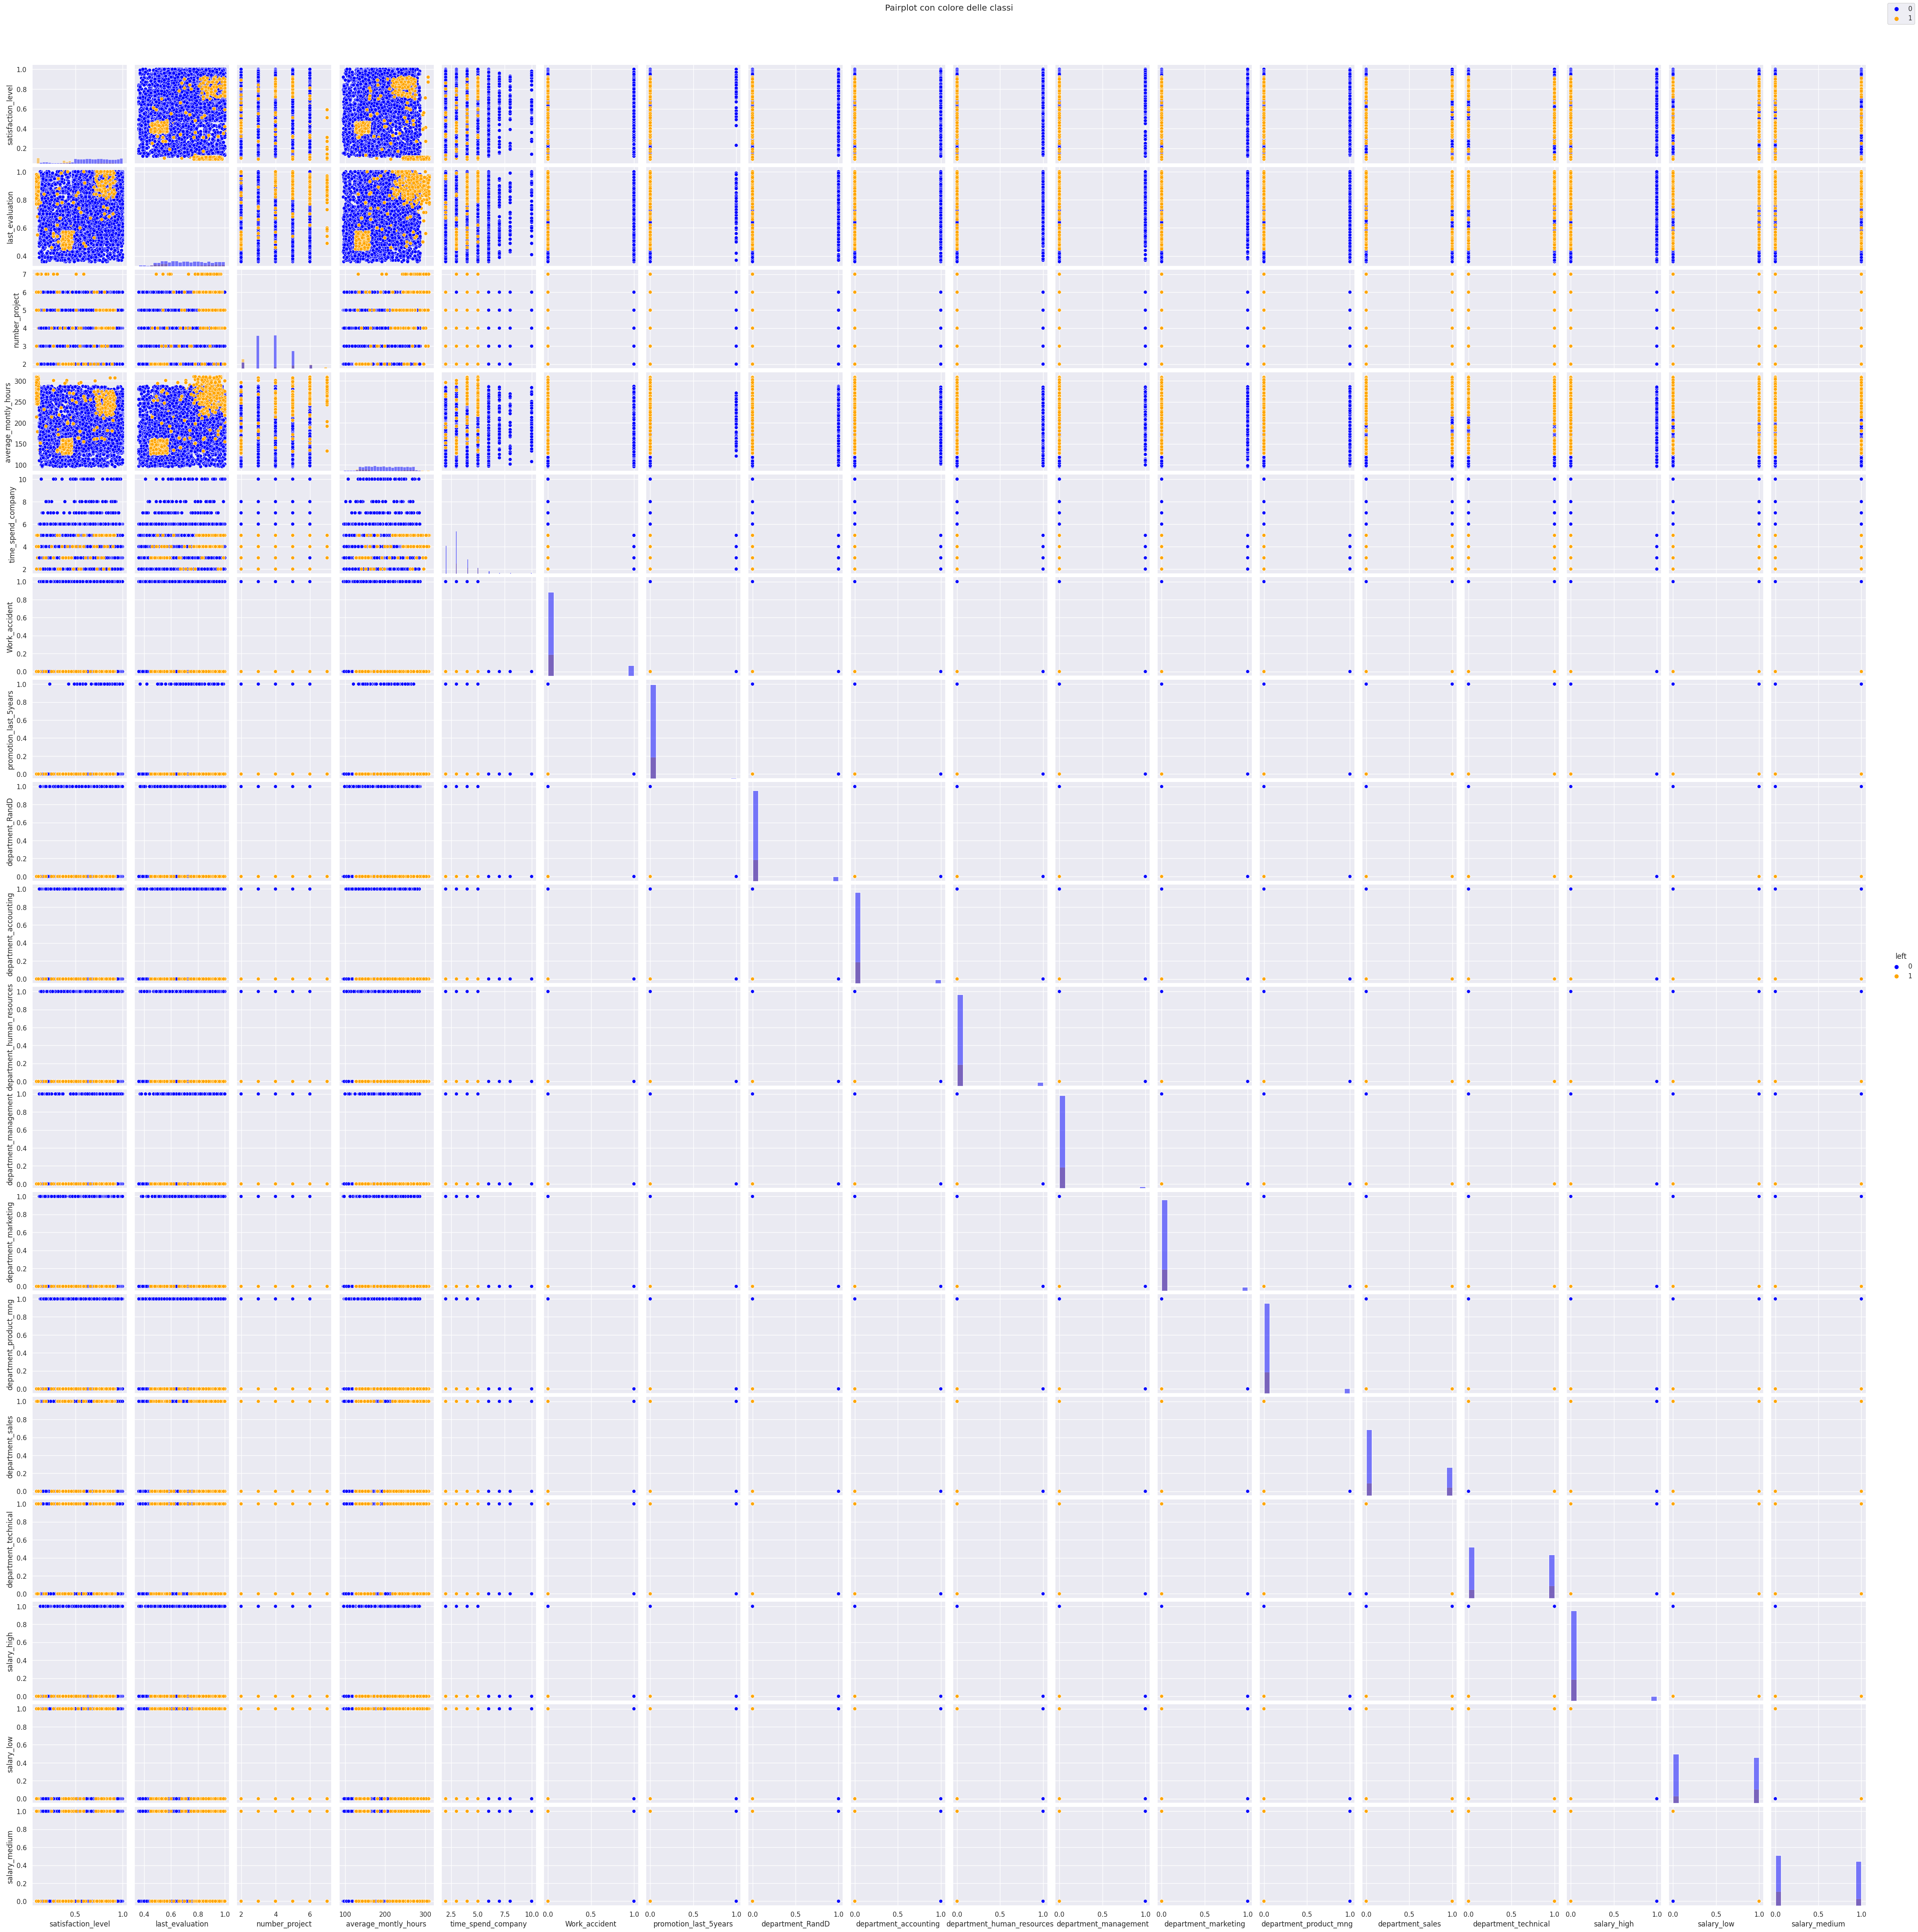

In [ ]:
# Crea un pairplot colorato
g = sns.pairplot(df_out, diag_kind='hist', hue='left', palette={0: 'blue', 1: 'orange'})

# Aggiungi una legenda
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper right')

# Aggiungi un titolo al pairplot
g.fig.suptitle("Pairplot con colore delle classi", y=1.02)

# Mostra il pairplot
plt.show()

### checkpoint dataset salvati
i dataset che andiamo a salvare nei formati csv e excel sono le versioni di quelli base dopo aver completato i principali task di cleaning dei dati e in ultima istanza abbiamo rimosso gli outlier individuati dal metodo IQR.

In [ ]:
excel_file_4 = 'Impiegati_senza_outlier.xlsx'
df_out.to_excel(excel_file_4, index=False)

In [ ]:
csv_file_4 = 'Impiegati_senza_outlier.csv'
df_out.to_csv(csv_file_4, index=False)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
y_train, y_test = y_train.values, y_test.values
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (11249, 18)
X_test shape:  (3750, 18)
y_train.shape:  (11249, 1)
y_test shape:  (3750, 1)


## Logistic Regression classifier

In [72]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [73]:
## Selezioniamo le migliori 10 feature per il modello
# Crea l'oggetto LogisticRegression
lg = LogisticRegression()

# Crea l'oggetto RFE con LogisticRegression come estimatore e seleziona le migliori 10 feature
rf = RFE(estimator=lg, n_features_to_select=10)

# Addestra il selettore delle feature sul training set
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [74]:
## effettuiamo le previsioni
pred_lg_r = rf.predict(X_test)

In [75]:
print("------------------------Accuracy------------------------")
print()
print(accuracy_score(y_test, pred_lg_r))
print()
print("------------------Classification_Report-----------------")
print()
print(classification_report(y_test, pred_lg_r))


------------------------Accuracy------------------------

0.7818666666666667

------------------Classification_Report-----------------

              precision    recall  f1-score   support

           0       0.81      0.92      0.87      2853
           1       0.58      0.33      0.42       897

    accuracy                           0.78      3750
   macro avg       0.70      0.63      0.64      3750
weighted avg       0.76      0.78      0.76      3750



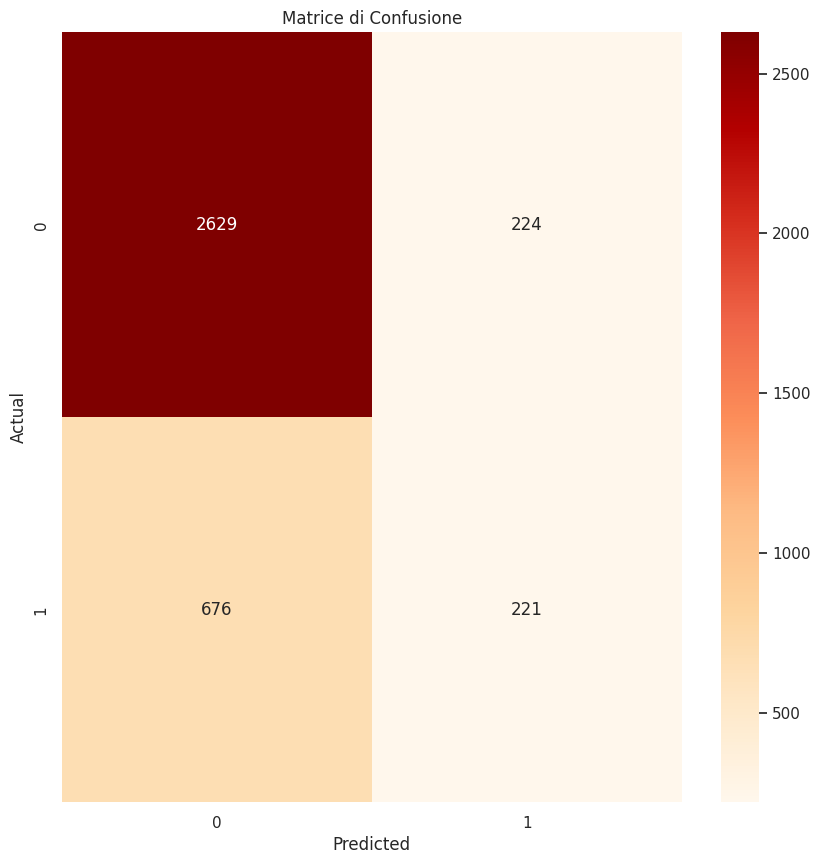

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g', cmap='OrRd')
# alternativa di colore
# sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g', cmap='YlOrBr')
plt.title('Matrice di Confusione')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature selection tramite cross validation
Andiamo a scegliere le feature più significative che migliorino il recall, stiamo dando più importanza al recall perchè è più importante capire chi sarà il prossimo a lasciare l'azienda piuttosto che scoprire chi sarà il prossimo a restare.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Numero ottimale di feature selezionate: 9
Recall del modello finale: 0.35228539576365664


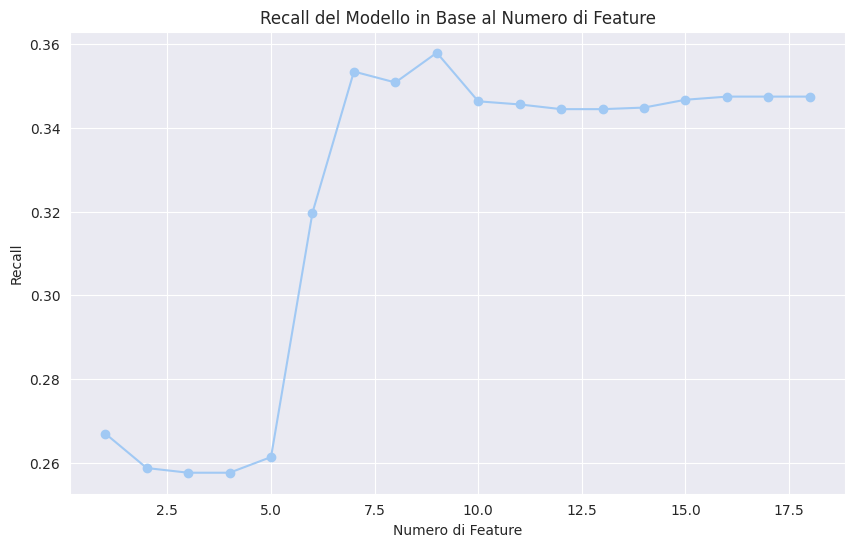

In [29]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score

# Crea l'oggetto LogisticRegression
lg = LogisticRegression()

# Inizializza il selettore delle feature RFECV con cross-validation
rfecv = RFECV(estimator=lg, step=1, cv=StratifiedKFold(5), scoring='recall')

# Addestra il selettore delle feature sulla totalità del training set
rfecv.fit(X_train, y_train)

# Trova il numero ottimale di feature
optimal_num_features = rfecv.n_features_

# Visualizza il numero ottimale di feature
print("Numero ottimale di feature selezionate:", optimal_num_features)

# Addestra il modello finale sul training set con le feature selezionate
lg_final = LogisticRegression()
lg_final.fit(X_train[:, rfecv.support_], y_train)

# Calcola il recall del modello finale sul test set
y_pred = lg_final.predict(X_test[:, rfecv.support_])
recall = recall_score(y_test, y_pred)

# Stampa il recall del modello finale
print("Recall del modello finale:", recall)

# Estrai il numero di feature e il recall per ogni iterazione di cross-validation
num_features = list(range(1, len(rfecv.cv_results_['mean_test_score']) + 1))
recall_scores = rfecv.cv_results_['mean_test_score']

# Traccia il grafico
plt.figure(figsize=(10, 6))
plt.plot(num_features, recall_scores, marker='o')
plt.xlabel("Numero di Feature")
plt.ylabel("Recall")
plt.title("Recall del Modello in Base al Numero di Feature")
plt.grid(True)
plt.show()

## Visualizzazione della curva di apprendimento del modello
andremo a creare dei plot che mettano in evidenza l'apprendimentoi del modello man mano che vede esempi.

In [28]:
# Questa funzione ci permetterà di andare a creare delle curve di apprendimento in base ad una metrica selezionata
# possiamo personalizzare il passo dell'apprendimento e il tipo di metrica usato
def incremental_training_plot(X, y, model, metric_function, metric_name, step_size=50):
    num_examples = len(X)
    num_steps = num_examples // step_size

    metric_scores = []
    num_examples_used = []

    for step in range(1, num_steps + 1):
        num_samples = step * step_size
        X_train = X[:num_samples]
        y_train = y[:num_samples]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        metric = metric_function(y_train, y_pred)

        metric_scores.append(metric)
        num_examples_used.append(num_samples)

    plt.figure(figsize=(10, 6))
    plt.plot(num_examples_used, metric_scores, marker='o')
    plt.xlabel("Numero di Esempi di Addestramento")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} in Base al Numero di Esempi di Addestramento")
    plt.grid(True)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

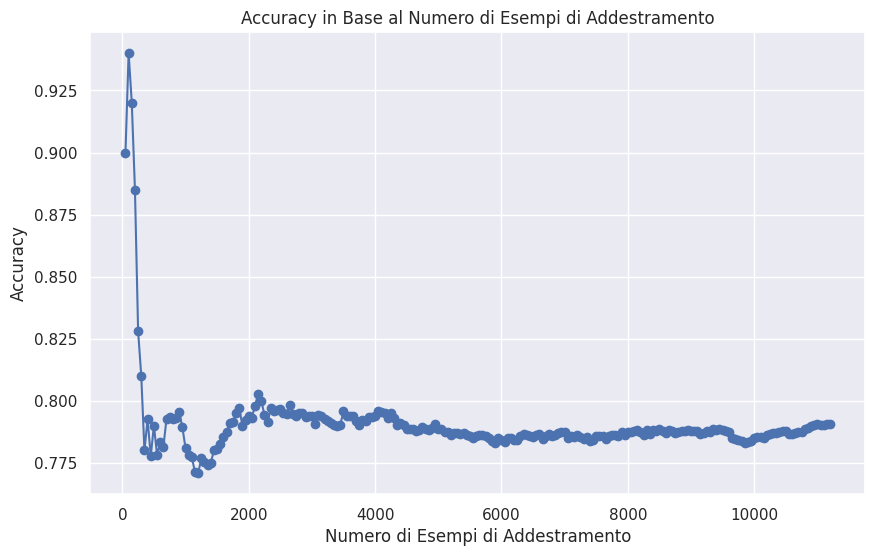

In [ ]:
# Creare il modello
lg_2 = LogisticRegression()

# Chiamare la funzione per addestrare incrementalmente e tracciare il grafico
incremental_training_plot(X_train, y_train, lg_2, accuracy_score, "Accuracy")

### Ottimizzazione sui fold della cross validation per Logistic Regression
Andiamo a trovaare il numero k di fold che più ci aiuta nell'apprrendimento come ben sappiamo in base alla letturatura scientifica i valori di k maggiormente usati sono 5, 10, 15, 20 e questo è dovuto alla legge di Struges che ci dice che k = 1 + log2(esempi_del_dataset) per cui avremo un indice indicato da questa regola di K = 15, ma cerchiamo di capire se si può fare di meglio sperimentalmente.

In [30]:
# la funzione eseguirà l'addestramento del modello usato una cross validartion stratificata
# e andra a plottare un grafico che mostrerà i risultati dell'addestramento in base ad una
# metrica che si vuole massimizzare
def kfold_crossval_plot(X, y, model, metric_function, metric_name, k_range):
    metric_scores = []
    num_folds_used = []

    for k in k_range:
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        fold_metrics = []

        for train_index, val_index in kf.split(X, y):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            metric = metric_function(y_val, y_pred)

            fold_metrics.append(metric)

        avg_metric = np.mean(fold_metrics)
        metric_scores.append(avg_metric)
        num_folds_used.append(k)

    plt.figure(figsize=(10, 6))
    plt.plot(num_folds_used, metric_scores, marker='o')
    plt.xlabel("Numero di Folds (k)")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} in Base al Numero di Folds (k)")
    plt.grid(True)
    plt.show()


Andiamo ad stanziare un modello ed ad addestrarlo con una cross validation stratificata andando a creare un grafico che mostri il miglior k per la k-cross validation.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

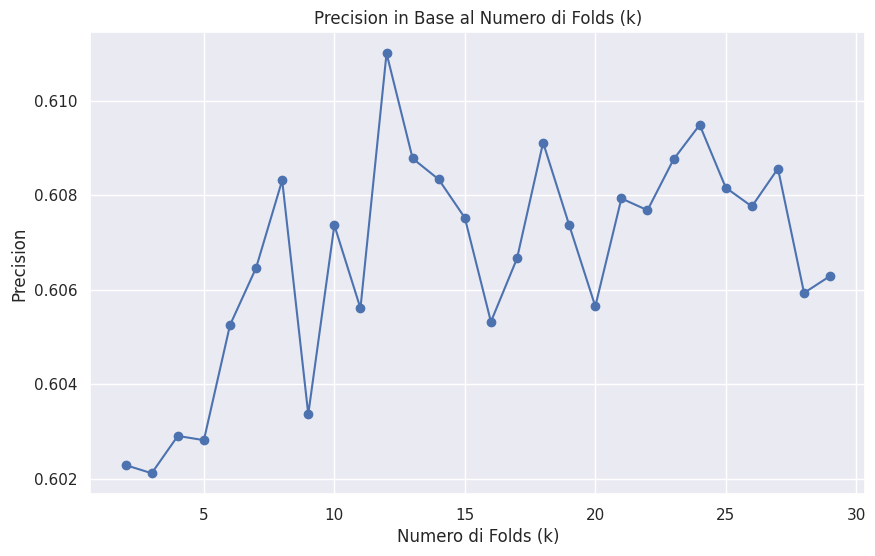

In [ ]:
# Creare un modello di logistic regression
lg_kcross = LogisticRegression()

# Definire il range di valori k per la k-fold cross-validation
# [2, 3, 5, 7, 10]
#k_values = range(1,30)

# Chiamare la funzione per addestrare e tracciare il grafico
kfold_crossval_plot(X_train, y_train, lg, precision_score, "Precision", range(2,30))

### Ottimizzazione degli iperparametri del modello
Andremo a creare un dizionario con le chiavi i nomi dei parametri che vogliamo ottimizzare e come valore passeremo dellle liste di possibili valori che il modello andrà aad utilizzare infine passeremo questo dizionario al metodo gridsearch della libreria sklearn che andrà ad ottimizzarli.

In [31]:
# griglia dei parametri da opttimizzare per la regressione logistica
param_log_reg = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [41]:
# Creare il modello
lg = LogisticRegression()


# Creare l'oggetto GridSearchCV, lo addestrriamo e inseguito ottimizziamo i parametri
grid_search = GridSearchCV(estimator=lg, param_grid=param_log_reg, scoring='recall', cv=13) # utilizziamo il k=13 ottimizzato in precedenza
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Stampa i parametri ottimali trovati
print("Parametri ottimali:", grid_search.best_params_)

# Stampa il punteggio del modello migliore
print("Recall del modello migliore:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Parametri ottimali: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Recall del modello migliore: 0.7917029454088418


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [42]:
# salviamo in queste variabili i parametri migliori e il recall ottenuto
best_param_log_reg = grid_search.best_params_
recall_log_reg_best_param = grid_search.best_score_
print(f"Parametri per logistic regression: {best_param_log_reg}\nRecall associato: {recall_log_reg_best_param}")

Parametri per logistic regression: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Recall associato: 0.7917029454088418


In [32]:
def train_with_crossval(model, X, y, num_folds=5):
    """
    Addestra un modello utilizzando la k-cross validation stratificata e restituisce le metriche richieste.

    Parametri:
        model: L'istanza del modello da addestrare.
        X: Le features del dataset.
        y: I target del dataset.
        num_folds: Il numero di folds per la k-cross validation.

    Ritorna:
        La media dell'accuracy ottenuta con la k-cross validation.
        Il classification report medio ottenuto con la k-cross validation.
    """
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    accuracy_scores = []
    classification_reports = []
    confusion_matrices = []  # Aggiunto per le matrici di confusione

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        report = classification_report(y_test, y_pred, output_dict=True)
        classification_reports.append(report)

        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

    mean_accuracy = np.mean(accuracy_scores)
    mean_classification_report = merge_classification_reports(classification_reports)
    mean_confusion_matrix = np.mean(confusion_matrices, axis=0)  # Calcola la media delle matrici di confusione

    return mean_accuracy, mean_classification_report, mean_confusion_matrix


def merge_classification_reports(reports):
    """
    Calcola la media dei classification report ottenuti dalla k-cross validation.

    Parametri:
        reports: Una lista di classification report in formato dizionario.

    Ritorna:
        Il classification report medio.
    """
    avg_report = {
        '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0},
        '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0},
        'accuracy': 0.0,
        'macro avg': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0},
        'weighted avg': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}
    }

    for report in reports:
        for label in ['0', '1']:
            for metric in ['precision', 'recall', 'f1-score', 'support']:
                avg_report[label][metric] += report[label][metric]
        avg_report['accuracy'] += report['accuracy']
        for label in ['macro avg', 'weighted avg']:
            for metric in ['precision', 'recall', 'f1-score', 'support']:
                avg_report[label][metric] += report[label][metric]

    num_reports = len(reports)
    for label in ['0', '1']:
        for metric in ['precision', 'recall', 'f1-score', 'support']:
            avg_report[label][metric] /= num_reports
    avg_report['accuracy'] /= num_reports
    for label in ['macro avg', 'weighted avg']:
        for metric in ['precision', 'recall', 'f1-score', 'support']:
            avg_report[label][metric] /= num_reports

    return avg_report

In [43]:
# Adesso andremo ad istanziare il modello finale di regression logistica che terrà in conto
# di tutte le ottimizzazioni fatte prima di effettuare questo ultimo addestramento
lg_reg_best_model = LogisticRegression(**best_param_log_reg)

# Crea l'oggetto RFE con LogisticRegression come estimatore e utilizziamo numero feature = 9 ottimizzato in precedenza
rf = RFE(estimator=lg_reg_best_model, n_features_to_select=9)

In [44]:
num_folds_lg_final = 13  # Specificare il numero di folds desiderato
# Chiamare la funzione per addestrare con k-cross validation e ottenere le metriche
mean_acc_lg_final, mean_report_lg_final,  mean_confusion_matrix_lg_final = train_with_crossval(lg_reg_best_model, X_train, y_train, num_folds_lg_final)

# Stampare la media dell'accuracy
print("------------------------Accuracy------------------------------")
print(mean_acc_lg_final)
print()

# Stampare il classification report finale in un formato migliorato
print("------------------Final Classification Report-----------------")
labels = ['0', '1', 'macro avg', 'weighted avg']
metrics = ['precision', 'recall', 'f1-score', 'support']

print("{:<12} {:<12} {:<12} {:<12} {:<12}".format("", *metrics))
for label in labels:
    print("{:<12}".format(label), end="")
    for metric in metrics:
        value = mean_report_lg_final[label][metric]
        print(" {:<12.2f}".format(value), end="")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

------------------------Accuracy------------------------------
0.7561577791309866

------------------Final Classification Report-----------------
             precision    recall       f1-score     support     
0            0.92         0.74         0.82         659.62      
1            0.49         0.79         0.61         205.69      
macro avg    0.71         0.77         0.72         865.31      
weighted avg 0.82         0.76         0.77         865.31      


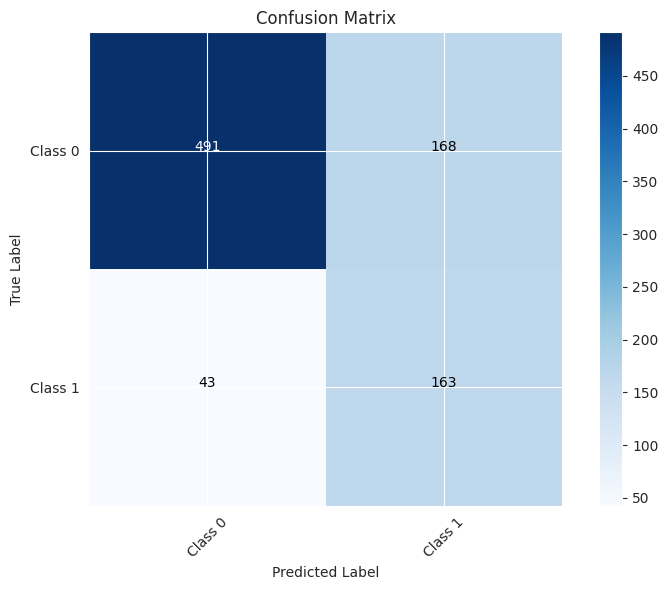

In [45]:
# Esempio di utilizzo
confusion_matrix_array = np.array(mean_confusion_matrix_lg_final)  # Esempio di matrice di confusione
class_labels = ['Class 0', 'Class 1']  # Esempio di etichette delle classi
plot_confusion_matrix_from_array(confusion_matrix_array, class_labels)

## Addestramento supervisionato con Naive Bayes Classifier
dopo aver effettuato l'addestramento base del modello logistic regression e in seguito aver fatto tutte le considerazioni per migliorarne l'apprendimento andiamo a creare una base line per il naive bayes e in seguito effettueremo i processi di ottimizzazioni per cercaare di migliorerne le performance

In [33]:
from sklearn.naive_bayes import GaussianNB

## Selezioniamo le migliori 10 feature per il modello
# Crea l'oggetto LogisticRegression
gnb = GaussianNB()

# Addestra il modello
gnb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [34]:
## effettuiamo le previsioni
pred_gnb = gnb.predict(X_test)

In [35]:
print("------------------------Accuracy------------------------")
print()
print(accuracy_score(y_test, pred_gnb))
print()
print("------------------Classification_Report-----------------")
print()
print(classification_report(y_test, pred_gnb))


------------------------Accuracy------------------------

0.6493333333333333

------------------Classification_Report-----------------

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      2853
           1       0.39      0.83      0.53       897

    accuracy                           0.65      3750
   macro avg       0.65      0.71      0.63      3750
weighted avg       0.79      0.65      0.67      3750



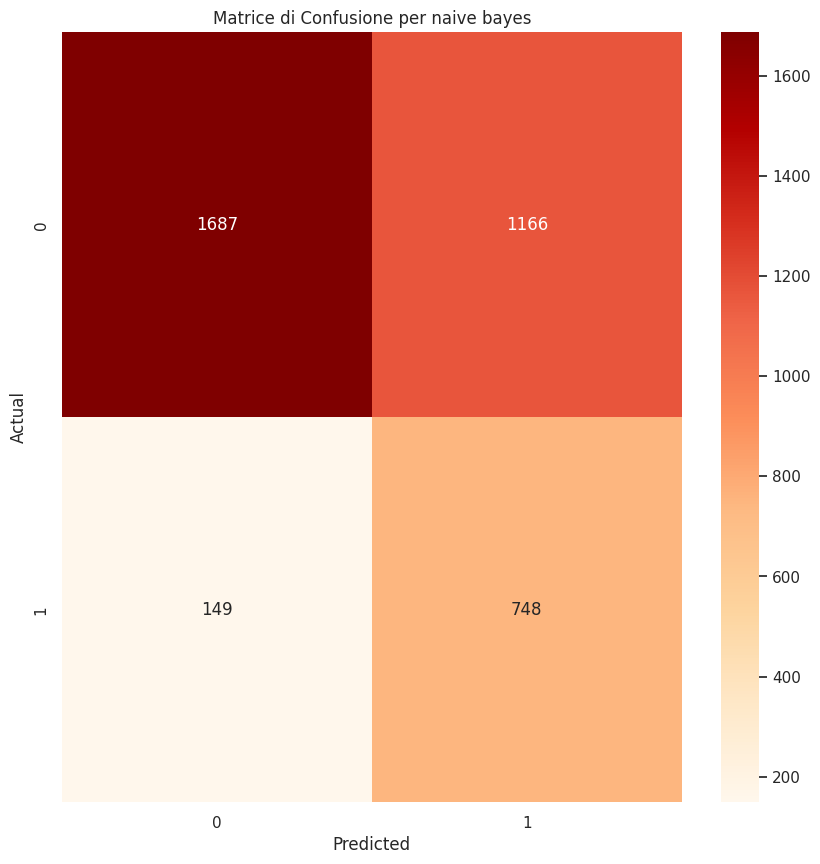

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred_gnb), annot=True, fmt='g', cmap='OrRd')
# alternativa di colore
# sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g', cmap='YlOrBr')
plt.title('Matrice di Confusione per naive bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

# Crea e addestra un classificatore Gaussian Naive Bayes
gnb_2 = GaussianNB()
gnb_2.fit(X_train, y_train)

# Calcola il recall del modello Gaussian Naive Bayes
y_pred_gnb_2 = gnb_2.predict(X_test)
recall = recall_score(y_test, y_pred_gnb_2, average='weighted')
print("Recall del modello Gaussian Naive Bayes:", recall)

# Effettua la feature selection utilizzando SelectKBest
# Scegliamo le migliori feature basate su ANOVA F-test
k_best = SelectKBest(score_func=f_classif, k=10)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Addestra un nuovo modello Gaussian Naive Bayes sulle feature selezionate
gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)

# Valuta il recall del modello con feature selezionate
y_pred_selected = gnb_selected.predict(X_test_selected)
recall_selected = recall_score(y_test, y_pred_selected, average='weighted')
print("Recall del modello con feature selezionate:", recall_selected)

# Recupera gli indici delle feature selezionate
selected_feature_indices = k_best.get_support(indices=True)

# Recupera i nomi delle colonne selezionate dal DataFrame
selected_feature_names = df_impiegati.columns[selected_feature_indices]
print("Feature selezionate:", selected_feature_names)

Recall del modello Gaussian Naive Bayes: 0.6493333333333333
Recall del modello con feature selezionate: 0.5845333333333333
Feature selezionate: Index(['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years',
       'department_human_resources', 'department_technical', 'salary_high',
       'salary_low'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Numero ottimale di feature selezionate: 3


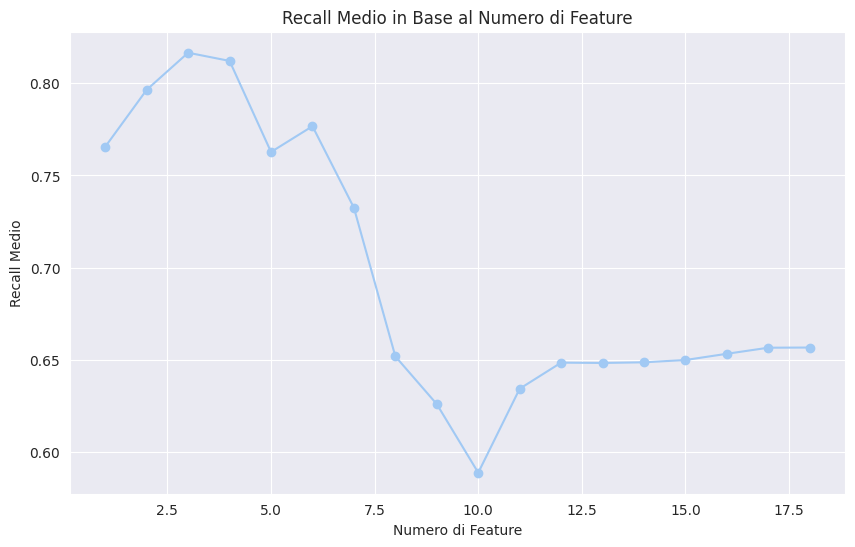

In [38]:
def feature_selection_with_cv(X, y, k=5, max_features=None):
    recalls = []
    feature_range = range(1, max_features + 1) if max_features else range(1, X.shape[1] + 1)

    for num_features in feature_range:
        k_fold_recall = []
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            gnb = GaussianNB()
            k_best = SelectKBest(score_func=f_classif, k=num_features)

            X_train_selected = k_best.fit_transform(X_train, y_train)
            X_val_selected = k_best.transform(X_val)

            gnb.fit(X_train_selected, y_train)
            y_pred_val = gnb.predict(X_val_selected)

            recall = recall_score(y_val, y_pred_val, average='weighted')
            k_fold_recall.append(recall)

        recalls.append(np.mean(k_fold_recall))

    optimal_num_features = feature_range[np.argmax(recalls)]
    print("Numero ottimale di feature selezionate:", optimal_num_features)

    plt.figure(figsize=(10, 6))
    plt.plot(feature_range, recalls, marker='o')
    plt.xlabel("Numero di Feature")
    plt.ylabel("Recall Medio")
    plt.title("Recall Medio in Base al Numero di Feature")
    plt.grid(True)
    plt.show()

# Utilizzo della funzione
feature_selection_with_cv(X_train, y_train, k=10, max_features=None)

## Visualizzazione della curva di apprendimento del modello Gaussian naive Bayes
andremo a creare dei plot che mettano in evidenza l'apprendimentoi del modello man mano che vede esempi.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

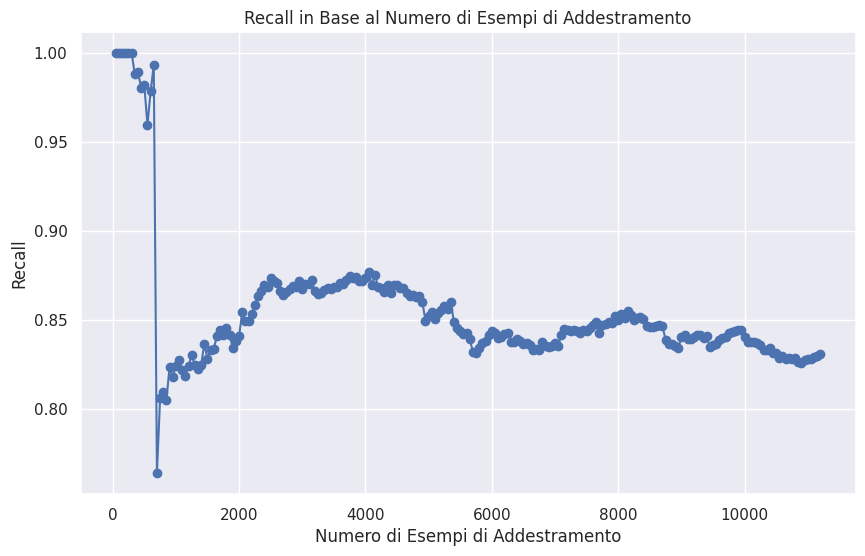

In [ ]:
# Creare il modello
gnb_3 = GaussianNB()

# Chiamare la funzione per addestrare incrementalmente e tracciare il grafico
incremental_training_plot(X_train, y_train, gnb_3, recall_score, "Recall")

### Ottimizzazione sui fold della cross validation per Gaussian Naive Bayes
Andiamo a trovaare il numero k di fold che più ci aiuta nell'apprrendimento come ben sappiamo in base alla letturatura scientifica i valori di k maggiormente usati sono 5, 10, 15, 20 e questo è dovuto alla legge di Struges che ci dice che k = 1 + log2(esempi_del_dataset) per cui avremo un indice indicato da questa regola di K = 15, ma cerchiamo di capire se si può fare di meglio sperimentalmente.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

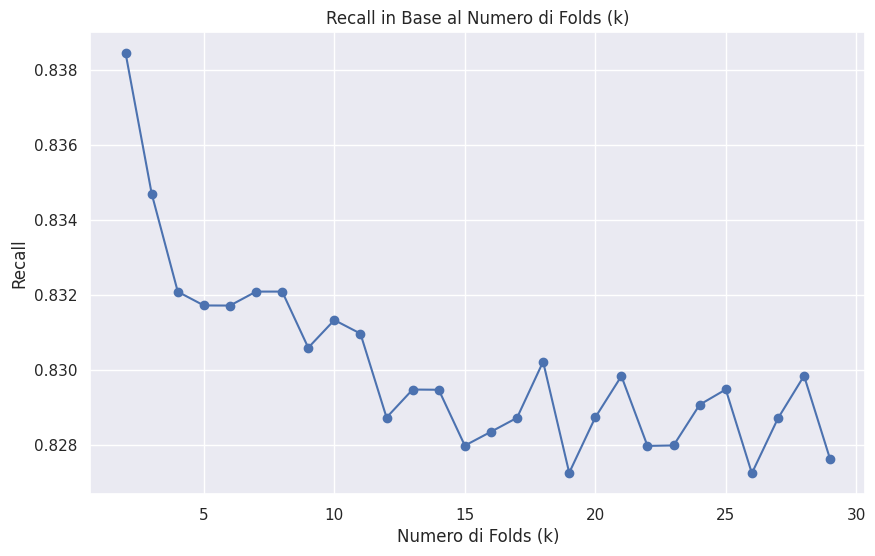

In [ ]:
# Andiamo a creare il modello di Gaussian Naive Bayes sul quale andare ad ottimizzare il k per il fold della
# cross validation
gnb_cross_otz = GaussianNB()

# Chiamare la funzione per addestrare e tracciare il grafico
kfold_crossval_plot(X_train, y_train, gnb_cross_otz, recall_score, "Recall", range(2,30))

### ottimizzazione degli iperparemetri del GaussianNB

In [95]:
from sklearn.model_selection import RandomizedSearchCV

param_gnb = {
    'priors': [[0.2, 0.8], [0.3, 0.7], [0.4, 0.6]],  # Probabilità classe negativa, probabilità classe positiva
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
}

# Crea il modello Gaussian Naive Bayes
gnb_otz_param = GaussianNB()

# Crea l'oggetto RandomizedSearchCV e addestralo
random_search_gnb = RandomizedSearchCV(estimator=gnb_otz_param, param_distributions=param_gnb, scoring='recall', cv=10, n_iter=50, random_state=42)
random_search_gnb.fit(X_train, y_train)

# Ottieni il modello migliore
best_gnb_model = random_search_gnb.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = co

In [ ]:
best_param_gnb = random_search_gnb.best_params_
best_recall_with_best_param_gnb = random_search_gnb.best_score_

# Stampa i parametri ottimali trovati
print("Parametri ottimali:",best_param_gnb)

# Stampa il punteggio del modello migliore
print("Recall del modello migliore:", best_recall_with_best_param_gnb )

Parametri ottimali: {'var_smoothing': 1, 'priors': [0.2, 0.8]}
Recall del modello migliore: 0.9756945609033485


Effettuiamo una controllo con la rgridsearch che offre una ricerca esaustiva e quindi un ottimizzazione masssima.

In [ ]:
# Crea il modello Gaussian Naive Bayes
gnb_otz_param_2 = GaussianNB()


# Creare l'oggetto GridSearchCV, lo addestrriamo e inseguito ottimizziamo i parametri
grid_search = GridSearchCV(estimator=gnb_otz_param_2, param_grid=param_gnb, scoring='recall', cv=7)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Stampa i parametri ottimali trovati
print("Parametri ottimali:", grid_search.best_params_)

# Stampa il punteggio del modello migliore
print("Recall del modello migliore:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Parametri ottimali: {'priors': [0.2, 0.8], 'var_smoothing': 1}
Recall del modello migliore: 0.9745699326851159


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
best_param_gnb_GridS = grid_search.best_params_
best_recall_with_best_param_gnb_GridS = grid_search.best_score_

# Stampa i parametri ottimali trovati
print("Parametri ottimali:",best_param_gnb_GridS )

# Stampa il punteggio del modello migliore
print("Recall del modello migliore:", best_recall_with_best_param_gnb_GridS)

Parametri ottimali: {'priors': [0.2, 0.8], 'var_smoothing': 1}
Recall del modello migliore: 0.9745699326851159


## modello finale Gaussin Naive Bayes dopo ottimizzazioni

In [ ]:
# Adesso andremo ad istanziare il modello finale di Gaussian Naive Bayes che terrà in conto
# di tutte le ottimizzazioni fatte prima di effettuare questo ultimo addestramento
gnb_final = GaussianNB(**best_param_gnb_GridS)


In [39]:
def plot_confusion_matrix_from_array(confusion_matrix_array, class_labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix_array, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    thresh = confusion_matrix_array.max() / 2.
    for i in range(confusion_matrix_array.shape[0]):
        for j in range(confusion_matrix_array.shape[1]):
            plt.text(j, i, format(confusion_matrix_array[i, j], '.0f'), horizontalalignment="center", color="white" if confusion_matrix_array[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()


In [ ]:
num_folds_gnb = 7  # Specificare il numero di folds desiderato
# Chiamare la funzione per addestrare con k-cross validation e ottenere le metriche
mean_acc_gnb_final, mean_report_gnb_final, mean_confusion_matrix_gnb_final = train_with_crossval(gnb_final, X_train, y_train, num_folds_gnb)

#mean_acc, mean_report, mean_cm = train_with_crossval(model, X, y)
# Stampare la media dell'accuracy
print("------------------------Accuracy------------------------------")
print(mean_acc_gnb_final)
print()

# Stampare il classification report finale in un formato migliorato
print("------------------Final Classification Report-----------------")
labels = ['0', '1', 'macro avg', 'weighted avg']
metrics = ['precision', 'recall', 'f1-score', 'support']

print("{:<12} {:<12} {:<12} {:<12} {:<12}".format("", *metrics))
for label in labels:
    print("{:<12}".format(label), end="")
    for metric in metrics:
        value = mean_report_gnb_final[label][metric]
        print(" {:<12.2f}".format(value), end="")
    print()

print("Media Confusion Matrix:")
print(mean_confusion_matrix_gnb_final )

------------------------Accuracy------------------------------
0.3706996177437994

------------------Final Classification Report-----------------
             precision    recall       f1-score     support     
0            0.96         0.18         0.31         1225.00     
1            0.27         0.97         0.42         382.00      
macro avg    0.61         0.58         0.37         1607.00     
weighted avg 0.79         0.37         0.33         1607.00     
Media Confusion Matrix:
[[ 223.57142857 1001.42857143]
 [   9.85714286  372.14285714]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

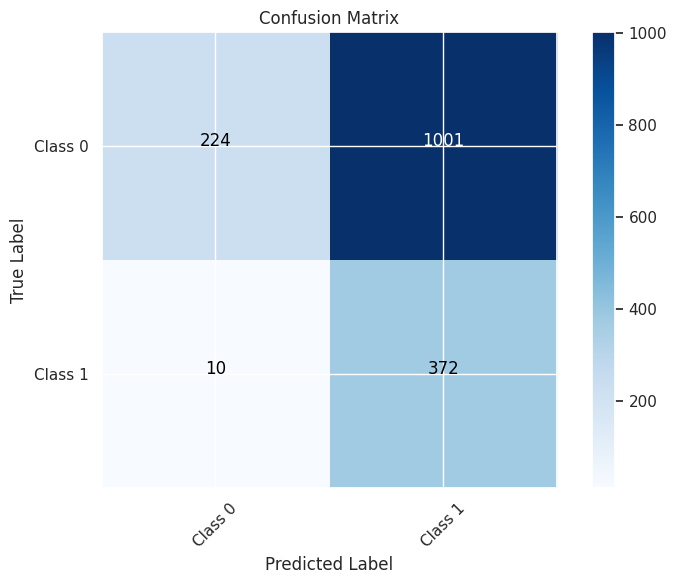

In [ ]:
# Esempio di utilizzo
confusion_matrix_array = np.array(mean_confusion_matrix_gnb_final )  # Esempio di matrice di confusione
class_labels = ['Class 0', 'Class 1']  # Esempio di etichette delle classi
plot_confusion_matrix_from_array(confusion_matrix_array, class_labels)

## Confronto tra i 2 modelli scelti per l'addestramento di base
Andremo ora ad plottare alcuni grafici per mettere a confronto le performance dei due classificatori.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


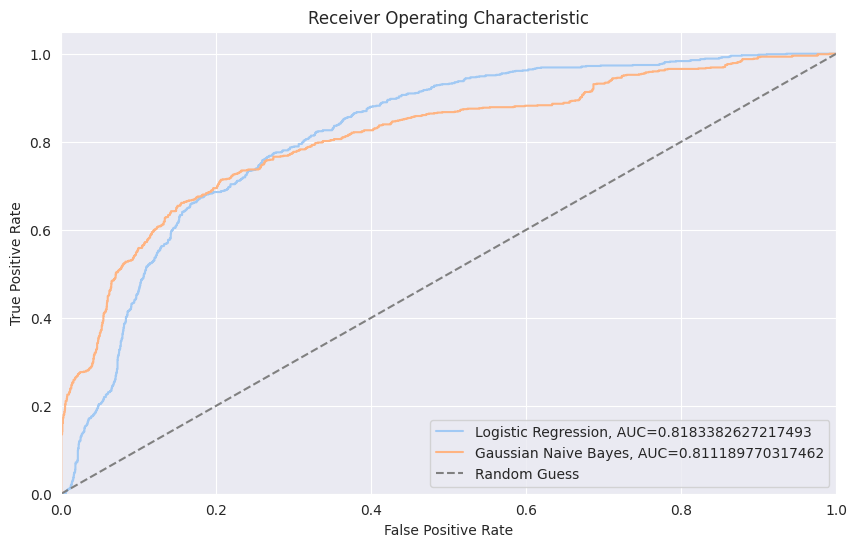

In [93]:
# Definisci i modelli
lgR = LogisticRegression()
gnB = GaussianNB()

# Addestra i modelli
lgR.fit(X_train, y_train)
gnB.fit(X_train, y_train)

# Calcola i punteggi delle probabilità positive
pred_lgR_positive = lgR.predict_proba(X_test)[:, 1]
pred_gnB_positive = gnB.predict_proba(X_test)[:, 1]

# Calcola le curve ROC e gli AUC
fpr_lgR, tpr_lgR, _ = roc_curve(y_test, pred_lgR_positive)
auc_lgR = roc_auc_score(y_test, pred_lgR_positive)

fpr_gnB, tpr_gnB, _ = roc_curve(y_test, pred_gnB_positive)
auc_gnB = roc_auc_score(y_test, pred_gnB_positive)

# Crea il grafico ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_lgR, tpr_lgR, label="Logistic Regression, AUC=" + str(auc_lgR))
plt.plot(fpr_gnB, tpr_gnB, label="Gaussian Naive Bayes, AUC=" + str(auc_gnB))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

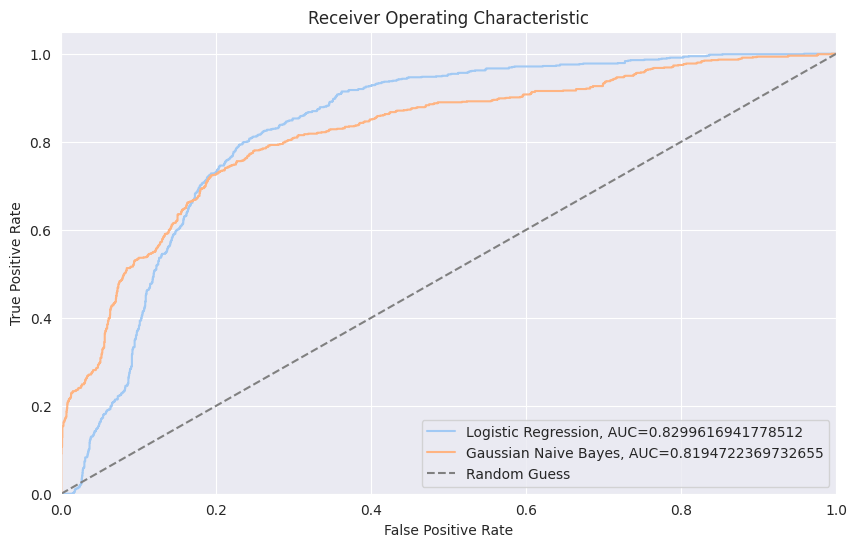

In [96]:
logREG = LogisticRegression()
GausNB = GaussianNB()

#logREG_cv_score = cross_val_score(logREG, X, y, cv=StratifiedKFold(n_splits=5, shuffle=False), scoring='recall')
#GausNB_cv_score = cross_val_score(GausNB, X, y, cv=StratifiedKFold(n_splits=5, shuffle=False), scoring='recall')

grid_logREG  = GridSearchCV(logREG, param_grid=param_log_reg, cv=StratifiedKFold(n_splits=13, shuffle=False), scoring='recall').fit(X, y)
grid_GausNB  = GridSearchCV(GausNB, param_grid=param_gnb, cv=StratifiedKFold(n_splits=7, shuffle=False), scoring='recall').fit(X, y)

# Calcola i punteggi delle probabilità positive
pred_logREG_positive = grid_logREG.predict_proba(X_test)[:, 1]
pred_GausNB_positive = grid_GausNB.predict_proba(X_test)[:, 1]

# Calcola le curve ROC e gli AUC
fpr_logREG , tpr_logREG , _ = roc_curve(y_test, pred_logREG_positive)
auc_logREG = roc_auc_score(y_test, pred_logREG_positive)

fpr_GausNB, tpr_GausNB, _ = roc_curve(y_test, pred_GausNB_positive)
auc_GausNB = roc_auc_score(y_test, pred_GausNB_positive)

# Crea il grafico ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_logREG, tpr_logREG, label="Logistic Regression, AUC=" + str(auc_logREG))
plt.plot(fpr_GausNB, tpr_GausNB, label="Gaussian Naive Bayes, AUC=" + str(auc_GausNB))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()